# Data analysis

In [1]:
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path

Data dir containing all files

In [2]:
!ls -la /home/ashinde/PhD/CaffineBravery/

total 48
drwxr-xr-x 21 ashinde ashinde 4096 Feb 16 13:21 .
drwxrwxr-x  6 ashinde ashinde   84 Dec  7 19:05 ..
drwxr-xr-x  7 ashinde ashinde  124 Nov 15 11:34 app
drwxr-xr-x  4 ashinde ashinde  142 Oct 15 15:33 domains
drwxr-xr-x  8 ashinde ashinde  220 Feb 16 16:13 .git
-rw-r--r--  1 ashinde ashinde  154 May 24  2022 .gitattributes
-rw-r--r--  1 ashinde ashinde  129 May 24  2022 .gitignore
drwxrwxr-x  6 ashinde ashinde   73 Jun  7  2022 .gradle
drwxr-xr-x  3 ashinde ashinde   21 May 24  2022 gradle
-rwxr-xr-x  1 ashinde ashinde 5774 May 24  2022 gradlew
-rw-r--r--  1 ashinde ashinde 2763 May 24  2022 gradlew.bat
drwxrwxr-x  2 ashinde ashinde   52 Jul 19  2022 policies
-rw-rw-r--  1 ashinde ashinde  743 Jun  7  2022 .project
drwxrwxr-x  2 ashinde ashinde   62 Nov 29 12:57 results
drwxrwxr-x  2 ashinde ashinde  101 Feb  1 18:21 results_l1_active
drwxrwxr-x  2 ashinde ashinde  108 Feb 16 15:17 results_l1_active_control
drwxrwxr-x  2 ashinde ashinde  100 Nov 29 21:44 results_l1_active_crit

In [3]:
# Data files
data_dir = Path("/home/ashinde/PhD/CaffineBravery/results_l2_control/")
data_files = list(data_dir.iterdir())

graph_files = list(filter(lambda x: "pol_graph" in str(x), data_files))
print(f"Policy graph files: {graph_files}")

trace_file = list(filter(lambda x: "trace" in str(x), data_files))[0]
print(f"Trace file: {trace_file}")

Policy graph files: [PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/1034094674_attl0_pol_graph.json'), PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/769132147_attl0_pol_graph.json'), PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/2116179210_defl1_active_pol_graph.json'), PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/1489193907_defl1_passive_pol_graph.json'), PosixPath('/home/ashinde/PhD/CaffineBravery/results_l2_control/2082509879_attl2_pol_graph.json')]
Trace file: /home/ashinde/PhD/CaffineBravery/results_l2_control/trace.json


In [4]:
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

In [5]:
# Draw policy graphs
def to_networkx_graph(json_data):

    nodes = json_data["nodes"]
    edges = json_data["edges"]

    G = networkx.MultiDiGraph()
    labels = {}
    edge_labels = {}
    edge_print = {}

    for k, v in nodes.items():
        
        if "start" in v.keys():
            labels[k] = f"start_{v['act']}"
        else:
            labels[k] = v["act"]
        G.add_node(k)
        
    for n, e in edges.items():
        for l, _n in e.items():
            G.add_edge(n, _n, label=l)
            
            e_data = G.get_edge_data(n, _n)
            label = [l["label"] for l in e_data.values()]
            # print(label)
            edge_labels[(n, _n)] = list(e_data.keys())

    # pos = networkx.shell_layout(G, scale=1)
    # networkx.draw_networkx_labels(G, pos, labels)
    
    print(G)
    pos = networkx.nx_pydot.graphviz_layout(G, prog="neato")
    networkx.draw(G, pos, labels=labels, with_labels=True, font_size=8, alpha=0.5, width=0.2)
    plotter.show()

---
## Plot policy graphs

/home/ashinde/PhD/CaffineBravery/results_l2_control/1034094674_attl0_pol_graph.json
MultiDiGraph with 14 nodes and 104 edges


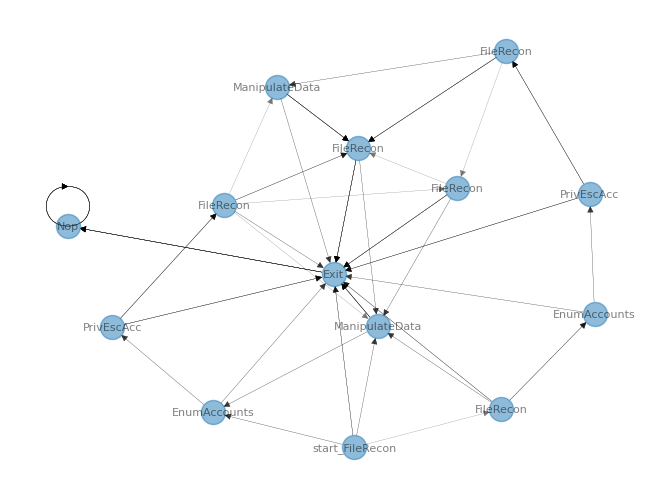

/home/ashinde/PhD/CaffineBravery/results_l2_control/769132147_attl0_pol_graph.json
MultiDiGraph with 12 nodes and 92 edges


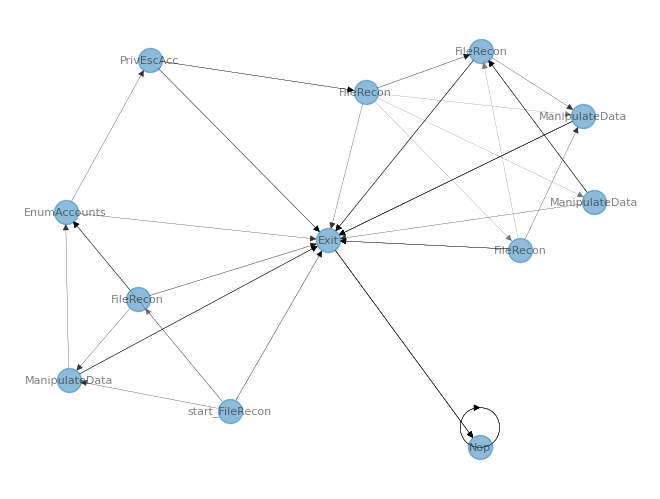

/home/ashinde/PhD/CaffineBravery/results_l2_control/2116179210_defl1_active_pol_graph.json
MultiDiGraph with 10 nodes and 40 edges


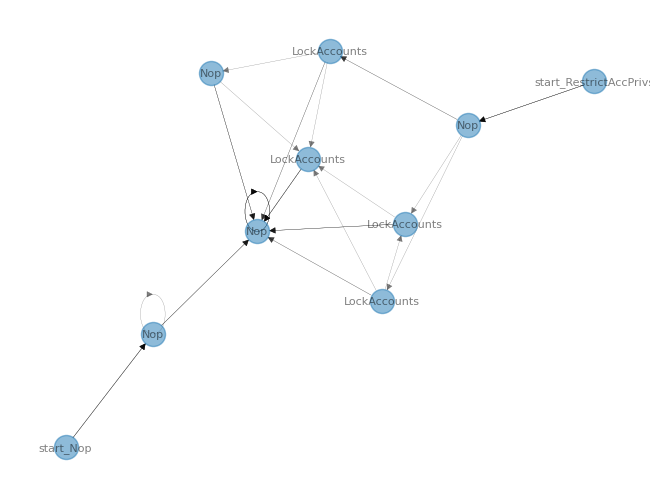

/home/ashinde/PhD/CaffineBravery/results_l2_control/1489193907_defl1_passive_pol_graph.json
MultiDiGraph with 15 nodes and 60 edges


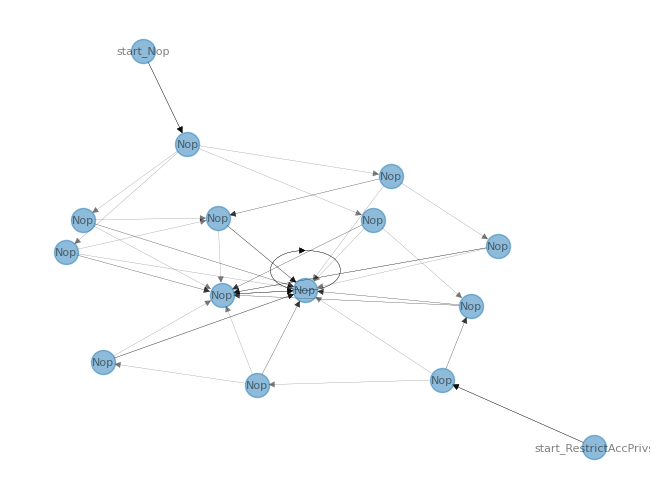

/home/ashinde/PhD/CaffineBravery/results_l2_control/2082509879_attl2_pol_graph.json
MultiDiGraph with 10 nodes and 154 edges


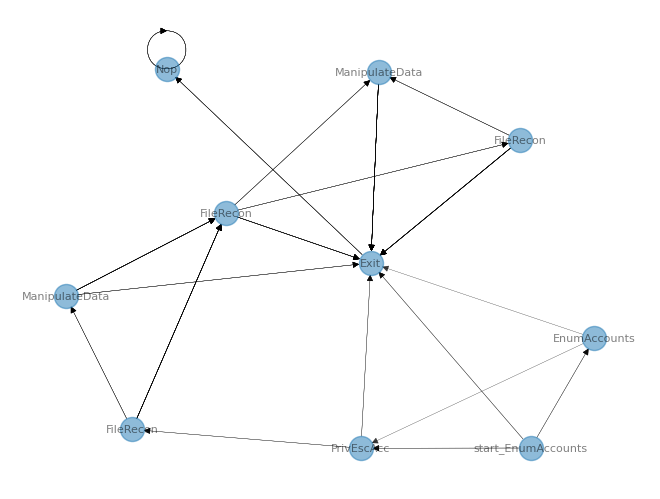

In [6]:
for g in graph_files:
    print(g)
    data = load_json(g)
    to_networkx_graph(data)

---
## Beliefs 

In [7]:
import summarize_interaction

# load json data
data = load_json(trace_file)

keys, b_traces = summarize_interaction.get_all_belief_traces(data)

print("Plotting belief divergence over")
for k in keys:
    print(k)

Plotting belief divergence over
('HostType', ['critical', 'critical_honeypot', 'honeypot'])
('HostHasData', ['no', 'yes'])
('DataPrivs', ['root', 'user'])
('EscAccounts', ['no', 'yes'])
('AccFound', ['no', 'yes'])
('DataFound', ['no', 'yes'])
('AccessLevel', ['root', 'user'])
('AttActive', ['no', 'yes'])
('DataInjected', ['no', 'yes'])


Plotting for ('HostType', ['critical', 'critical_honeypot', 'honeypot'])


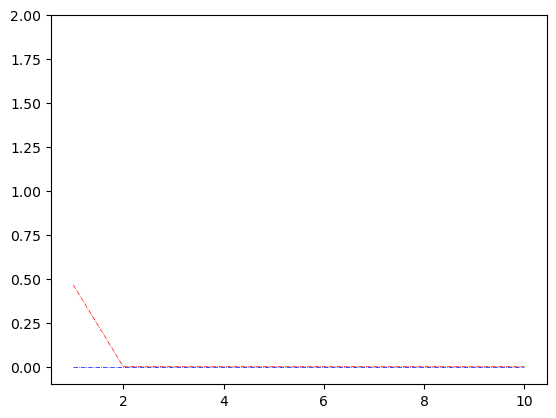

Plotting for ('HostHasData', ['no', 'yes'])


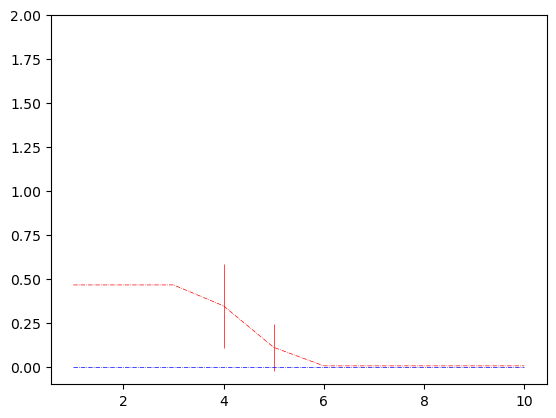

Plotting for ('DataPrivs', ['root', 'user'])


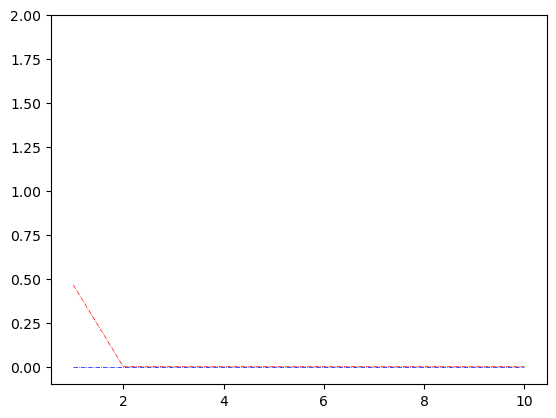

Plotting for ('EscAccounts', ['no', 'yes'])


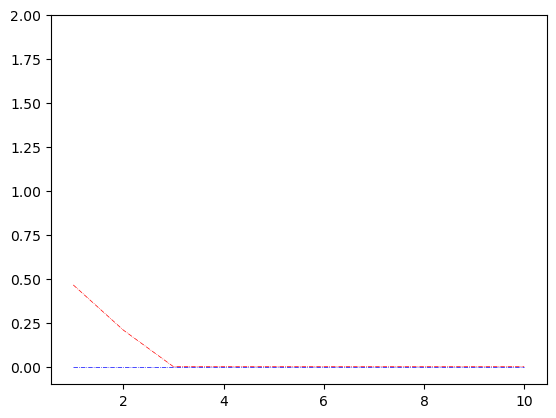

Plotting for ('AccFound', ['no', 'yes'])


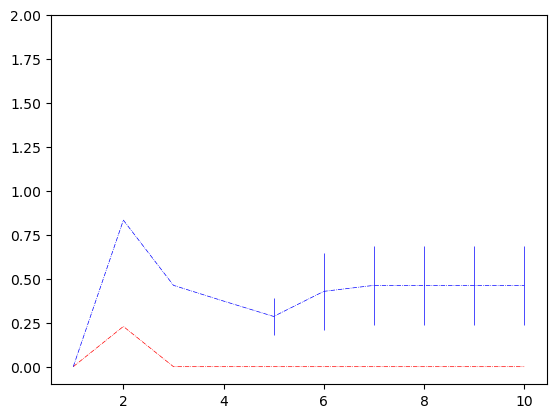

Plotting for ('DataFound', ['no', 'yes'])


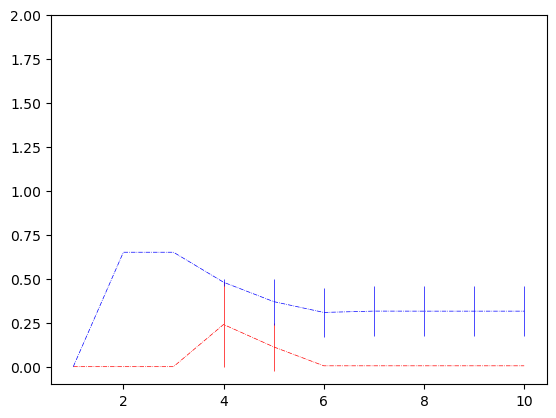

Plotting for ('AccessLevel', ['root', 'user'])


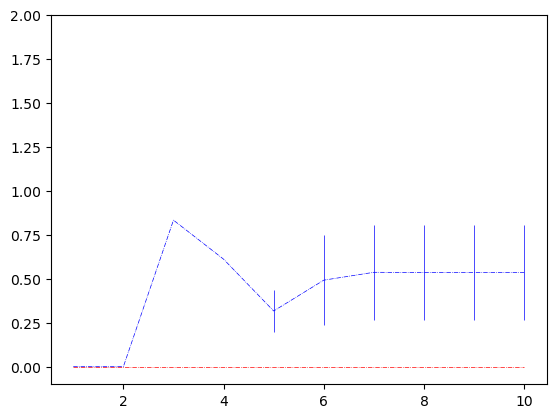

Plotting for ('AttActive', ['no', 'yes'])


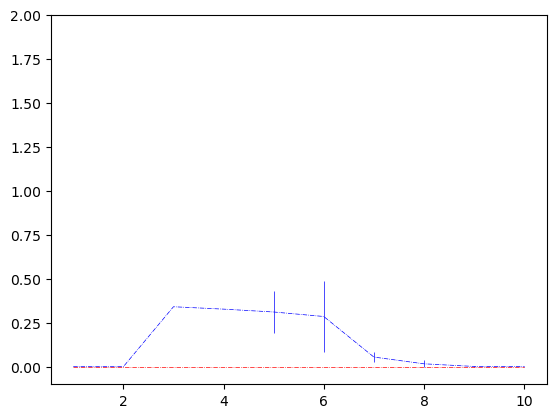

Plotting for ('DataInjected', ['no', 'yes'])


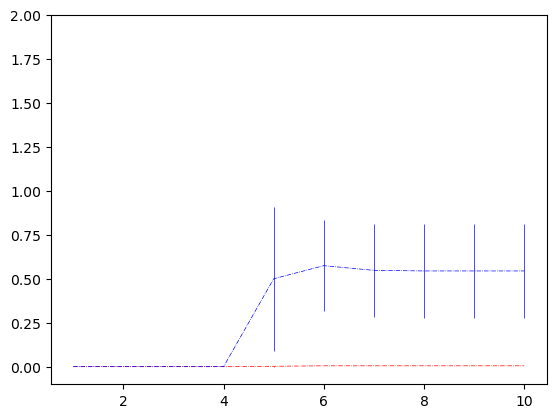

In [8]:
# Get divergence
divs = []
for b_trace in b_traces:
    divs.append(summarize_interaction.get_divergence(b_trace))
    
for i in range(len(keys)):
    print(f"Plotting for {keys[i]}")
    
    i_means = numpy.mean(divs[i][0], axis=0)
    i_dev = numpy.std(divs[i][0], axis=0)
    plotter.errorbar(numpy.linspace(1, i_means.shape[0], i_means.shape[0]), i_means, fmt='r-.', yerr=i_dev, linewidth=0.5)
    
    if len(divs[i]) > 1:
        j_means = numpy.mean(divs[i][1], axis=0)
        j_dev = numpy.std(divs[i][1], axis=0)
        plotter.errorbar(numpy.linspace(1, j_means.shape[0], j_means.shape[0]), j_means, fmt='b-.', yerr=j_dev, linewidth=0.5)
        # plotter.plot(divs[i][1].T, 'b-.', linewidth=0.5)
    
    plotter.ylim(-0.1, 2)
    plotter.show()
    

---
# Display interaction examples

,i_acts,"[""AccessPerm'"", ""HostObs'"", ""ActionResult'"", ""ConnStatus'"", ""DefenseObs'""]",j_acts,"[""EndPtAlerts'""]"
0,EnumAccounts,denied|user_files|success|active|perms_change,RestrictAccPrivs,file_enum
1,PrivEscAcc,auth|none|failure|active|none,Nop,login_activity
2,FileRecon,auth|user_files|success|active|none,Nop,file_enum
3,ManipulateData,auth|user_files|success|active|none,Nop,file_write
4,Exit,auth|user_files|failure|terminated|none,Nop,login_activity
5,Nop,denied|none|success|terminated|none,Nop,none
6,Nop,auth|user_files|success|terminated|none,Nop,none
7,Nop,denied|none|failure|terminated|none,Nop,file_enum
8,Nop,denied|user_files|failure|terminated|none,Nop,file_enum
9,Nop,auth|user_files|failure|terminated|none,Nop,none


Agent i's P(Aj)


,DecoyAccount,DeployData,LockAccounts,Nop,RestrictAccPrivs
0,0.0,0.0,0.000000,0.500000,0.5
1,0.0,0.0,0.000000,1.000000,0.0
2,0.0,0.0,0.500000,0.500000,0.0
3,0.0,0.0,0.040595,0.959405,0.0
4,0.0,0.0,0.000112,0.999888,0.0
5,0.0,0.0,0.000000,1.000000,0.0
6,0.0,0.0,0.000000,1.000000,0.0
7,0.0,0.0,0.000000,1.000000,0.0
8,0.0,0.0,0.000000,1.000000,0.0
9,0.0,0.0,0.000000,1.000000,0.0


Agent j's P(Aj)


,EnumAccounts,Exit,FileRecon,ManipulateData,Nop,PrivEscAcc
0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,0.630000,0.297000,0.063000,0.010000,0.000000,0.000000
2,0.046890,0.186760,0.000000,0.003150,0.297000,0.466200
3,0.000899,0.126514,0.259164,0.000000,0.276396,0.337026
4,0.000000,0.010206,0.357865,0.228353,0.402911,0.000665
5,0.000000,0.237923,0.090558,0.262753,0.408766,0.000000
6,0.000000,0.024129,0.000771,0.006237,0.968863,0.000000
7,0.000000,0.000378,0.000001,0.000036,0.999585,0.000000
8,0.000000,0.000040,0.000000,0.000015,0.999945,0.000000
9,0.000000,0.000015,0.000000,0.000000,0.999985,0.000000


,highCap,lowCap
0,0.500000,0.500000
1,0.500000,0.500000
2,0.500000,0.500000
3,0.047619,0.952381
4,0.009417,0.990583
5,0.009417,0.990583
6,0.009417,0.990583
7,0.009417,0.990583
8,0.009417,0.990583
9,0.009417,0.990583


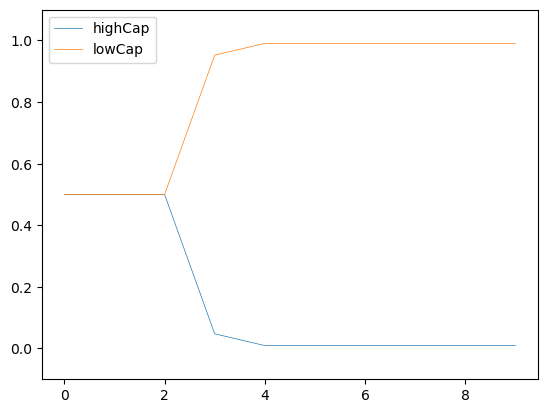

,att
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


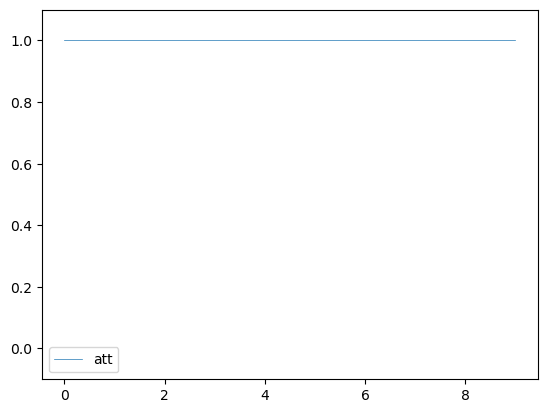

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


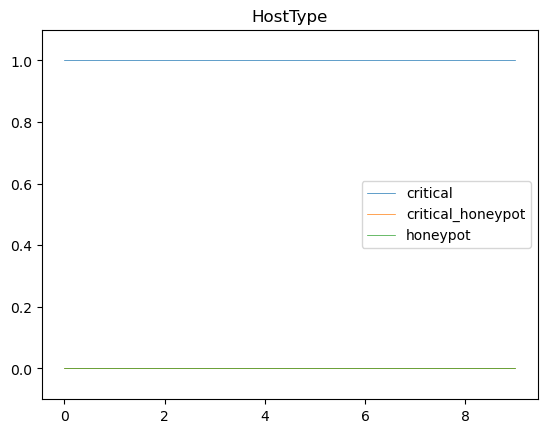

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


,critical,critical_honeypot,honeypot
0,0.5,0.0,0.5
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


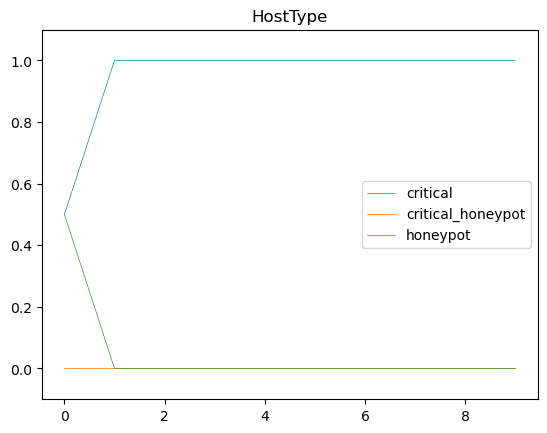

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


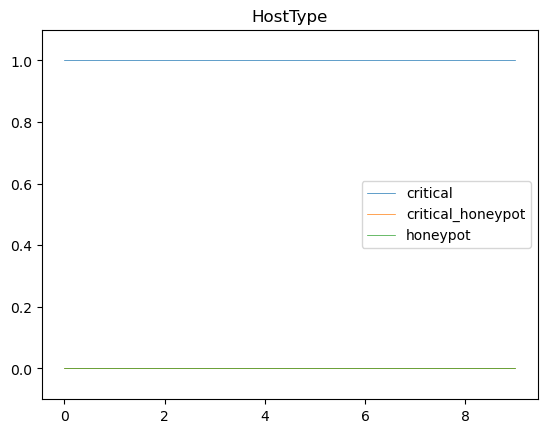

Showing ('HostHasData', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for state:


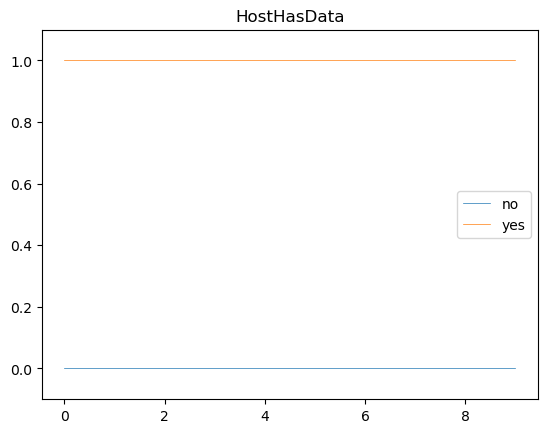

Showing ('HostHasData', ['no', 'yes']) for agent_i


,no,yes
0,0.500000,0.500000
1,0.500000,0.500000
2,0.500000,0.500000
3,0.064103,0.935897
4,0.000035,0.999965
5,0.000035,0.999965
6,0.000035,0.999965
7,0.000035,0.999965
8,0.000035,0.999965
9,0.000035,0.999965


Plotting ('HostHasData', ['no', 'yes']) for agent_i


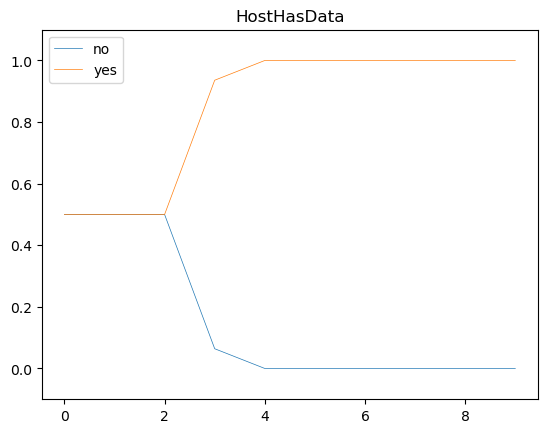

Showing ('HostHasData', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for agent_j


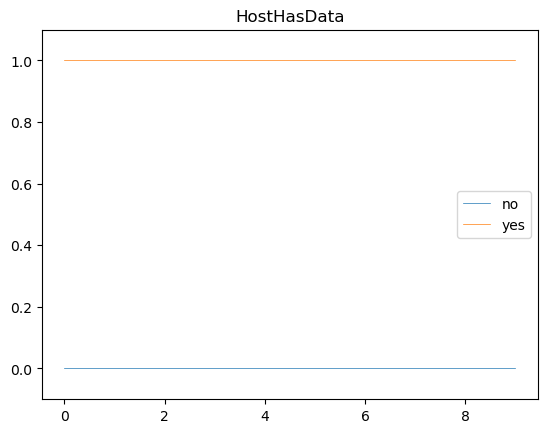

Showing ('DataPrivs', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('DataPrivs', ['root', 'user']) for state:


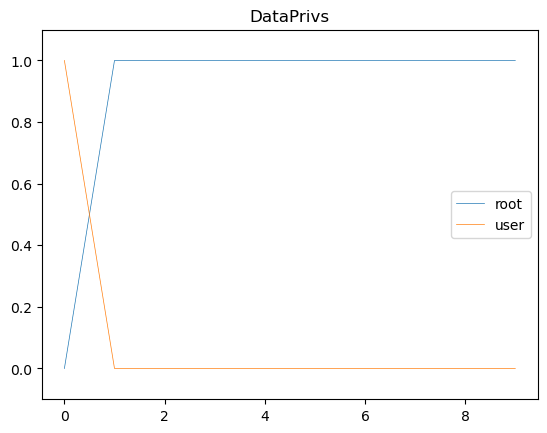

Showing ('DataPrivs', ['root', 'user']) for agent_i


,root,user
0,0.5,0.5
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('DataPrivs', ['root', 'user']) for agent_i


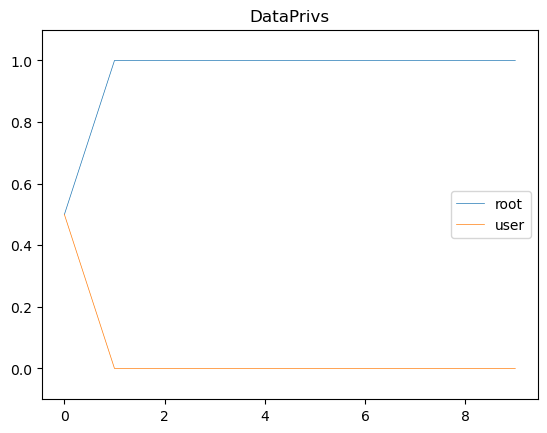

Showing ('DataPrivs', ['root', 'user']) for agent_j


,root,user
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('DataPrivs', ['root', 'user']) for agent_j


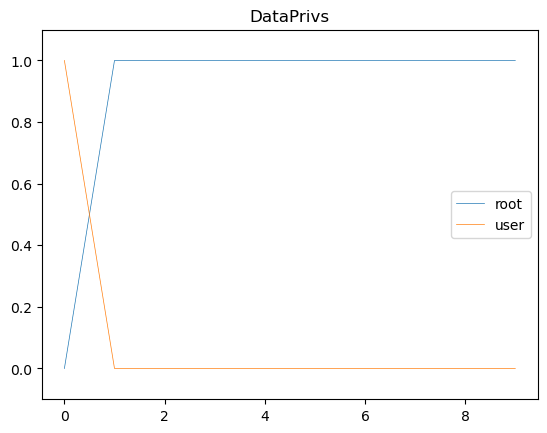

Showing ('EscAccounts', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for state:


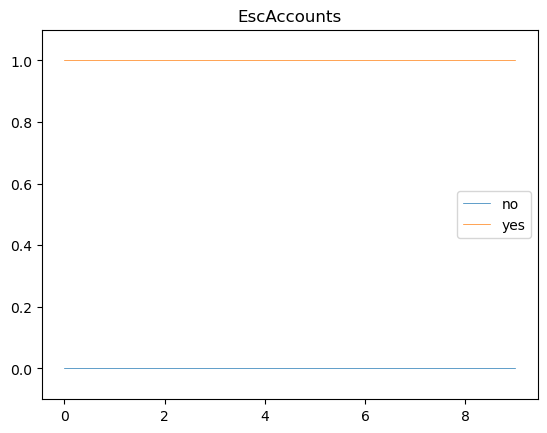

Showing ('EscAccounts', ['no', 'yes']) for agent_i


,no,yes
0,0.500000,0.500000
1,0.119048,0.880952
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.000000,1.000000


Plotting ('EscAccounts', ['no', 'yes']) for agent_i


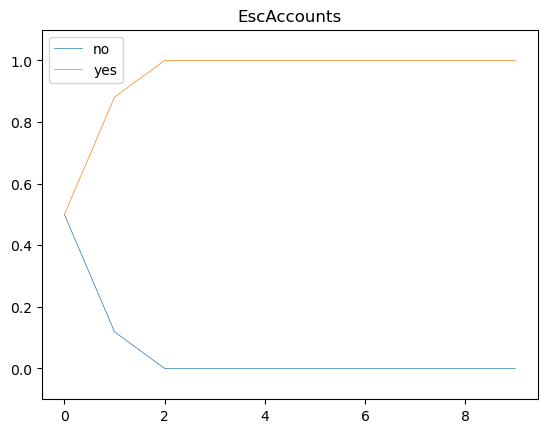

Showing ('EscAccounts', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for agent_j


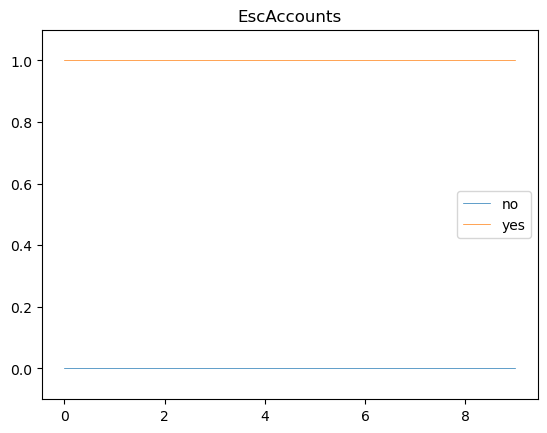

Showing ('AccFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('AccFound', ['no', 'yes']) for state:


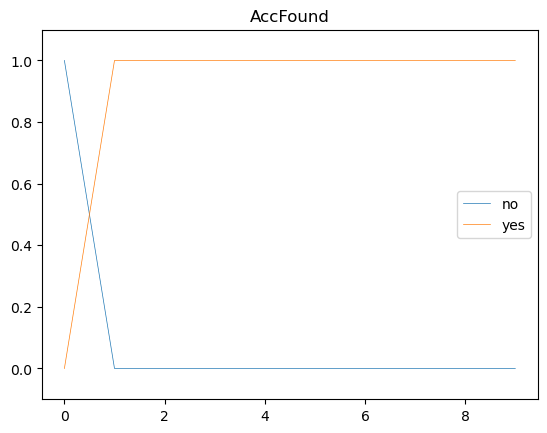

Showing ('AccFound', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,0.142857,0.857143
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.000000,1.000000


Plotting ('AccFound', ['no', 'yes']) for agent_i


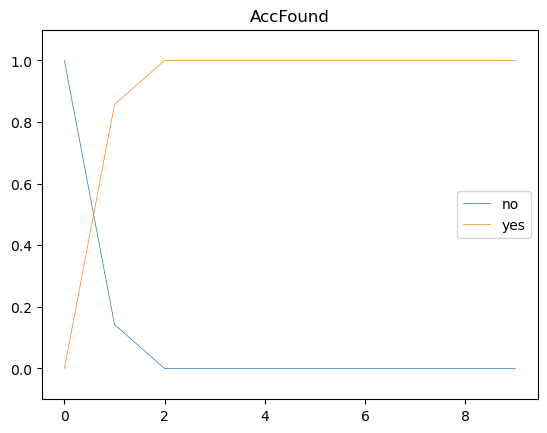

Showing ('AccFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,0.496000,0.504000
3,0.347687,0.652313
4,0.346968,0.653032
5,0.343598,0.656402
6,0.514776,0.485224
7,0.518194,0.481806
8,0.518185,0.481815
9,0.518185,0.481815


Plotting ('AccFound', ['no', 'yes']) for agent_j


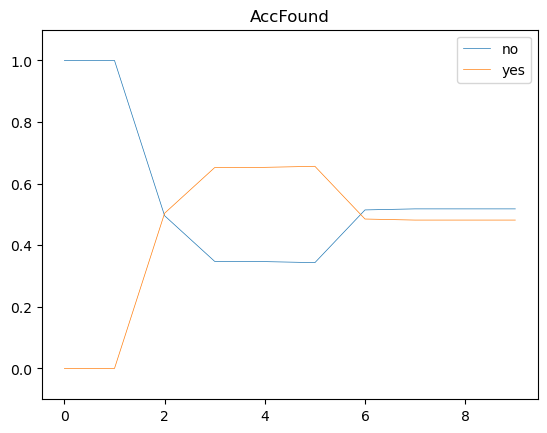

Showing ('DataFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataFound', ['no', 'yes']) for state:


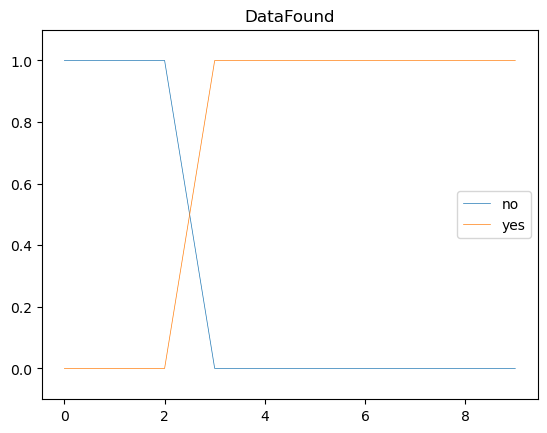

Showing ('DataFound', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,0.076923,0.923077
4,0.000042,0.999958
5,0.000042,0.999958
6,0.000042,0.999958
7,0.000042,0.999958
8,0.000042,0.999958
9,0.000042,0.999958


Plotting ('DataFound', ['no', 'yes']) for agent_i


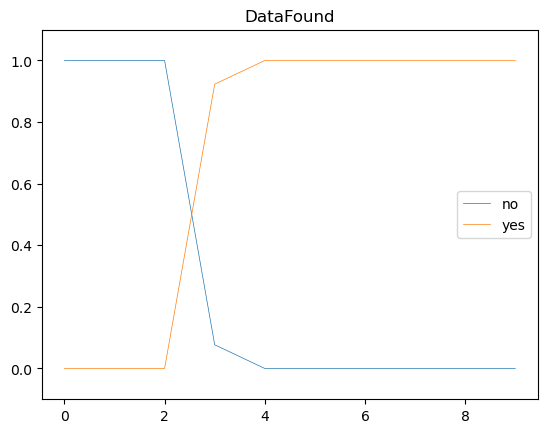

Showing ('DataFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,0.200000,0.800000
2,0.200000,0.800000
3,0.542920,0.457080
4,0.519883,0.480117
5,0.261722,0.738278
6,0.294025,0.705975
7,0.295460,0.704540
8,0.295456,0.704544
9,0.295456,0.704544


Plotting ('DataFound', ['no', 'yes']) for agent_j


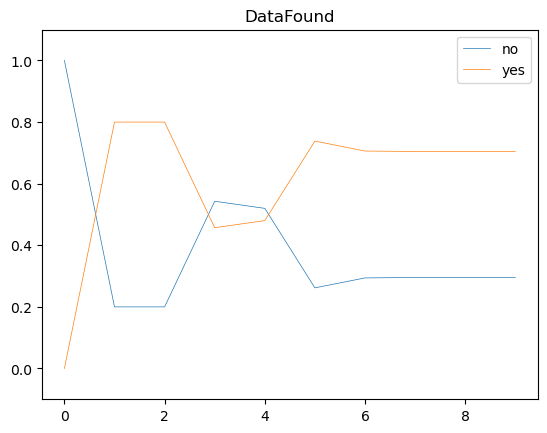

Showing ('AccessLevel', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccessLevel', ['root', 'user']) for state:


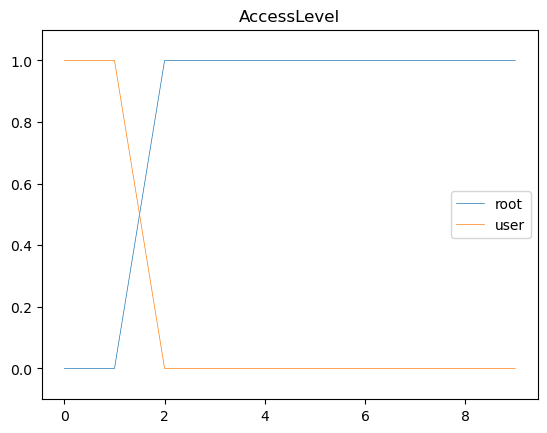

Showing ('AccessLevel', ['root', 'user']) for agent_i


,root,user
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccessLevel', ['root', 'user']) for agent_i


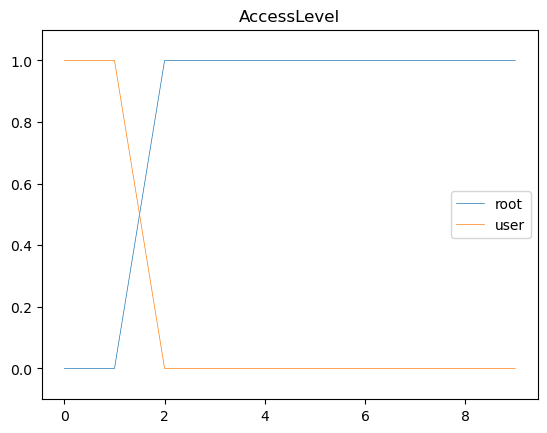

Showing ('AccessLevel', ['root', 'user']) for agent_j


,root,user
0,0.000000,1.000000
1,0.000000,1.000000
2,0.000000,1.000000
3,0.259164,0.740836
4,0.587082,0.412918
5,0.591786,0.408214
6,0.388418,0.611582
7,0.384357,0.615643
8,0.384368,0.615632
9,0.384368,0.615632


Plotting ('AccessLevel', ['root', 'user']) for agent_j


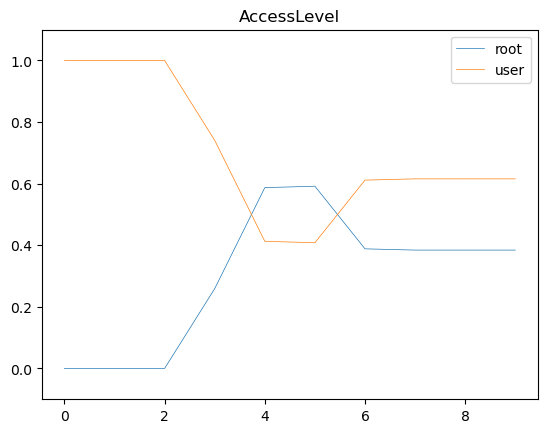

Showing ('AttActive', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for state:


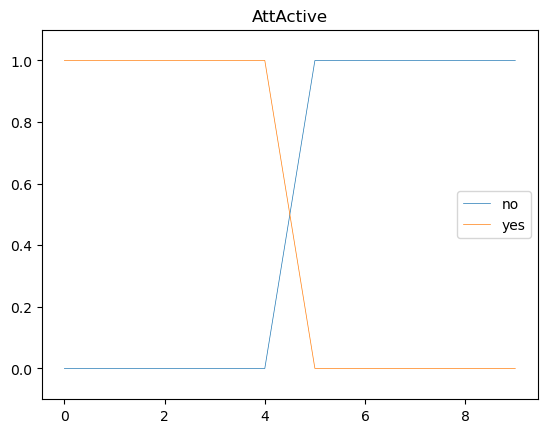

Showing ('AttActive', ['no', 'yes']) for agent_i


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for agent_i


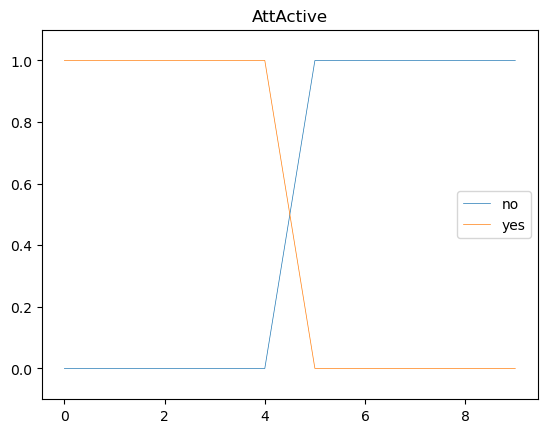

Showing ('AttActive', ['no', 'yes']) for agent_j


,no,yes
0,0.000000,1.000000
1,0.000000,1.000000
2,0.297000,0.703000
3,0.276396,0.723604
4,0.402911,0.597089
5,0.408766,0.591234
6,0.968863,0.031137
7,0.999585,0.000415
8,0.999945,0.000055
9,0.999985,0.000015


Plotting ('AttActive', ['no', 'yes']) for agent_j


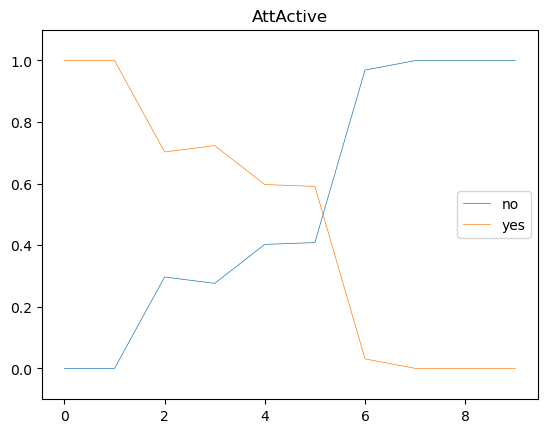

Showing ('DataInjected', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataInjected', ['no', 'yes']) for state:


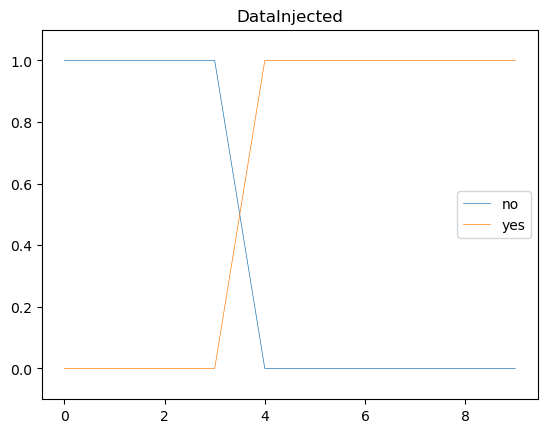

Showing ('DataInjected', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,0.000042,0.999958
5,0.000042,0.999958
6,0.000042,0.999958
7,0.000042,0.999958
8,0.000042,0.999958
9,0.000042,0.999958


Plotting ('DataInjected', ['no', 'yes']) for agent_i


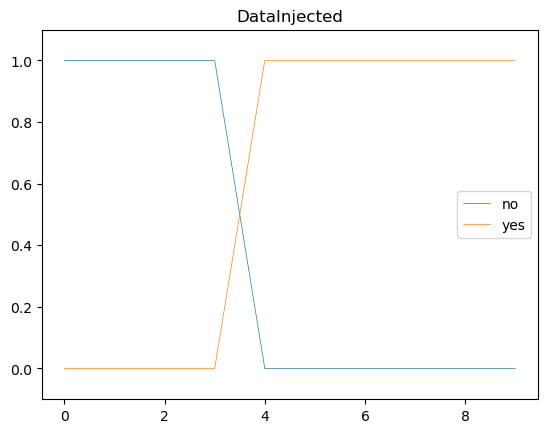

Showing ('DataInjected', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,1.000000,0.000000
5,0.774337,0.225663
6,0.639271,0.360729
7,0.636536,0.363464
8,0.636506,0.363494
9,0.636492,0.363508


Plotting ('DataInjected', ['no', 'yes']) for agent_j


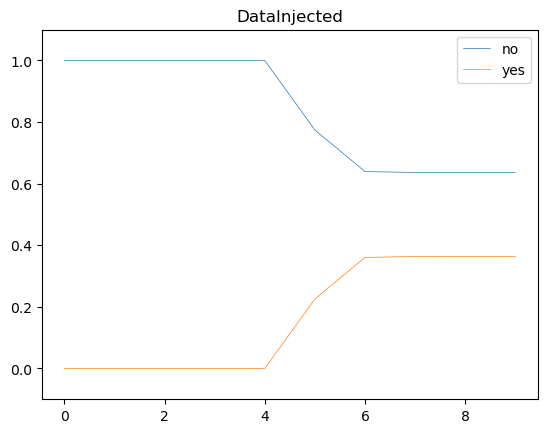

=============== End interaction trace


,i_acts,"[""AccessPerm'"", ""HostObs'"", ""ActionResult'"", ""ConnStatus'"", ""DefenseObs'""]",j_acts,"[""EndPtAlerts'""]"
0,EnumAccounts,denied|user_files|success|active|perms_change,RestrictAccPrivs,file_enum
1,PrivEscAcc,auth|none|success|active|none,Nop,login_activity
2,FileRecon,auth|user_files|success|active|none,Nop,file_enum
3,ManipulateData,auth|user_files|success|active|none,Nop,file_write
4,Exit,auth|none|success|terminated|none,Nop,none
5,Nop,auth|none|failure|terminated|none,Nop,none
6,Nop,auth|user_files|failure|terminated|none,Nop,none
7,Nop,auth|none|failure|terminated|none,Nop,login_activity
8,Nop,denied|user_files|success|terminated|none,Nop,none
9,Nop,auth|none|success|terminated|none,Nop,login_activity


Agent i's P(Aj)


,DecoyAccount,DeployData,LockAccounts,Nop,RestrictAccPrivs
0,0.0,0.0,0.000000,0.500000,0.5
1,0.0,0.0,0.000000,1.000000,0.0
2,0.0,0.0,0.500000,0.500000,0.0
3,0.0,0.0,0.040595,0.959405,0.0
4,0.0,0.0,0.000112,0.999888,0.0
5,0.0,0.0,0.000000,1.000000,0.0
6,0.0,0.0,0.000000,1.000000,0.0
7,0.0,0.0,0.000000,1.000000,0.0
8,0.0,0.0,0.000000,1.000000,0.0
9,0.0,0.0,0.000000,1.000000,0.0


Agent j's P(Aj)


,EnumAccounts,Exit,FileRecon,ManipulateData,Nop,PrivEscAcc
0,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
1,0.630000,2.970000e-01,6.300000e-02,1.000000e-02,0.000000,0.000000
2,0.046890,1.867600e-01,0.000000e+00,3.150000e-03,0.297000,0.466200
3,0.000899,1.265143e-01,2.591644e-01,0.000000e+00,0.276396,0.337026
4,0.000000,1.020642e-02,3.578650e-01,2.283527e-01,0.402911,0.000665
5,0.000000,3.155999e-02,1.066589e-02,3.489537e-02,0.922879,0.000000
6,0.000000,2.232187e-03,5.135435e-05,5.166063e-04,0.997200,0.000000
7,0.000000,3.100021e-05,5.820171e-09,2.421287e-06,0.999967,0.000000
8,0.000000,2.422442e-06,0.000000e+00,4.664632e-09,0.999997,0.000000
9,0.000000,2.743902e-10,0.000000e+00,0.000000e+00,1.000000,0.000000


,highCap,lowCap
0,0.500000,0.500000
1,0.500000,0.500000
2,0.500000,0.500000
3,0.047619,0.952381
4,0.009417,0.990583
5,0.009417,0.990583
6,0.009417,0.990583
7,0.009417,0.990583
8,0.009417,0.990583
9,0.009417,0.990583


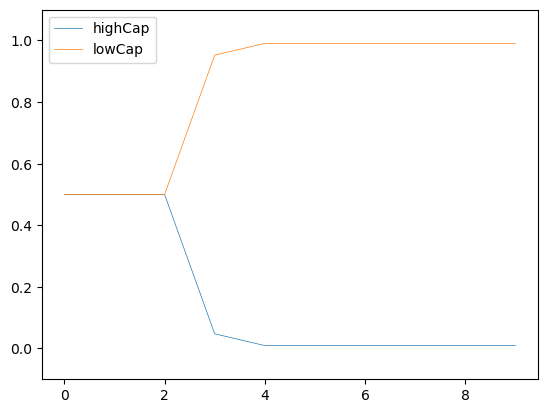

,att
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


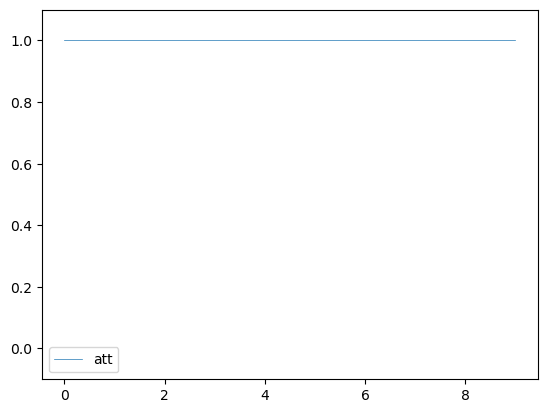

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


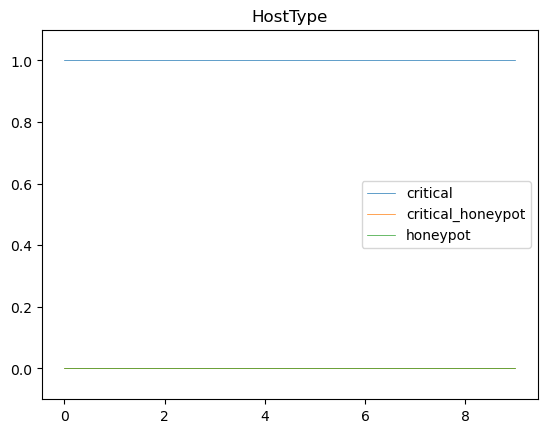

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


,critical,critical_honeypot,honeypot
0,0.5,0.0,0.5
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


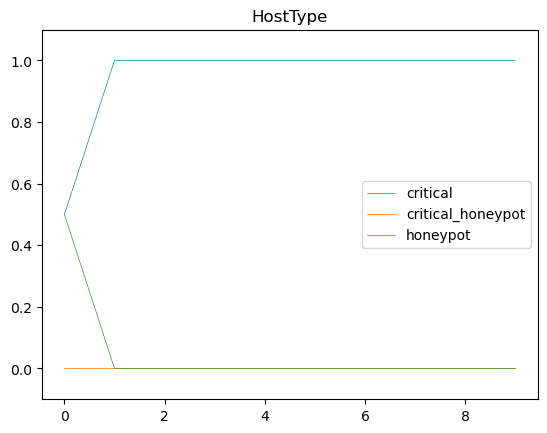

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


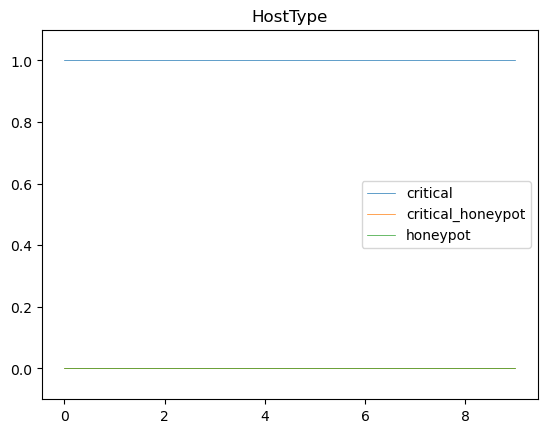

Showing ('HostHasData', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for state:


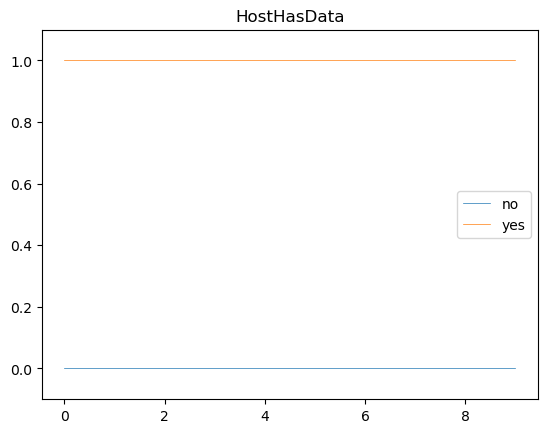

Showing ('HostHasData', ['no', 'yes']) for agent_i


,no,yes
0,0.500000,0.500000
1,0.500000,0.500000
2,0.500000,0.500000
3,0.064103,0.935897
4,0.000035,0.999965
5,0.000035,0.999965
6,0.000035,0.999965
7,0.000035,0.999965
8,0.000035,0.999965
9,0.000035,0.999965


Plotting ('HostHasData', ['no', 'yes']) for agent_i


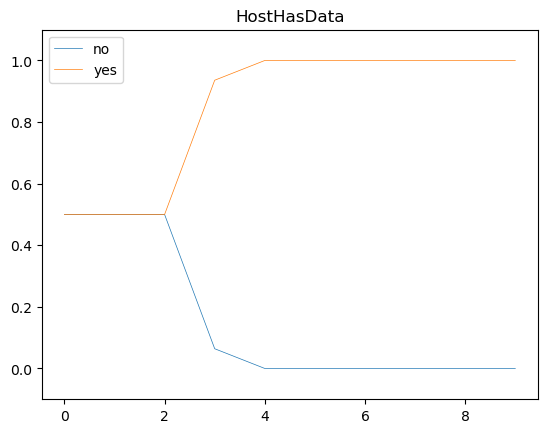

Showing ('HostHasData', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for agent_j


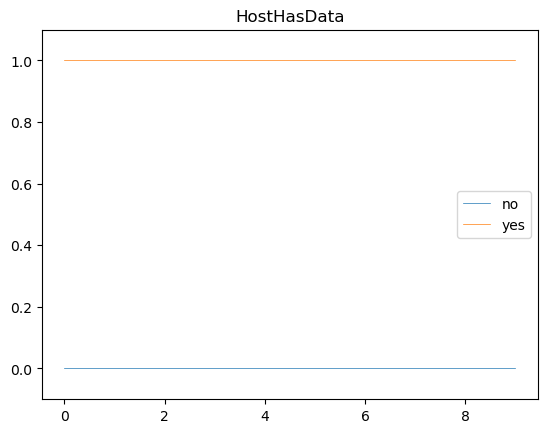

Showing ('DataPrivs', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('DataPrivs', ['root', 'user']) for state:


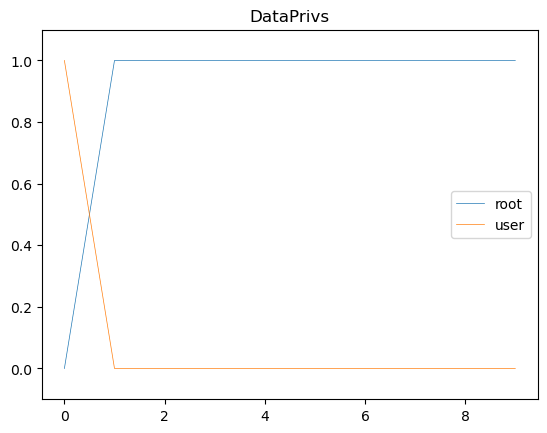

Showing ('DataPrivs', ['root', 'user']) for agent_i


,root,user
0,0.5,0.5
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('DataPrivs', ['root', 'user']) for agent_i


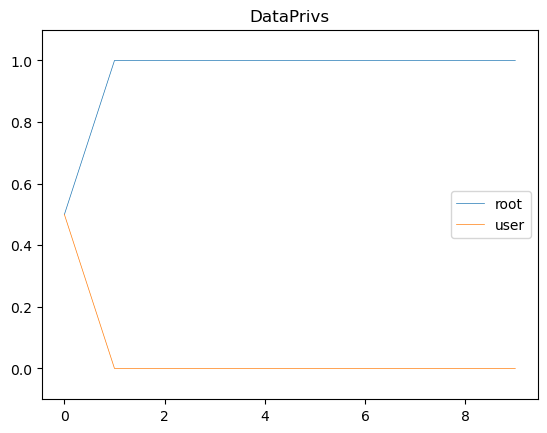

Showing ('DataPrivs', ['root', 'user']) for agent_j


,root,user
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('DataPrivs', ['root', 'user']) for agent_j


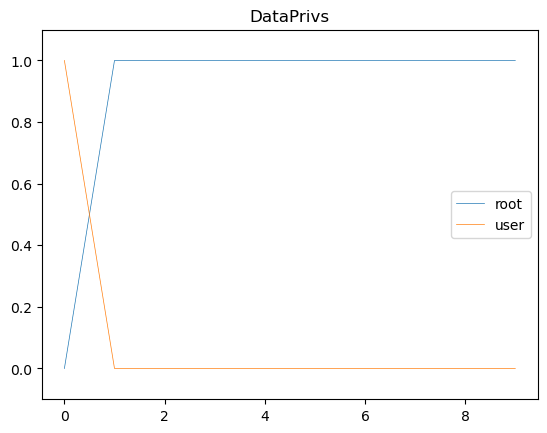

Showing ('EscAccounts', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for state:


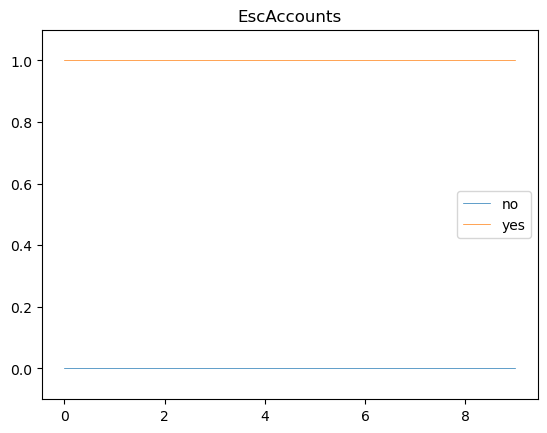

Showing ('EscAccounts', ['no', 'yes']) for agent_i


,no,yes
0,0.500000,0.500000
1,0.119048,0.880952
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.000000,1.000000


Plotting ('EscAccounts', ['no', 'yes']) for agent_i


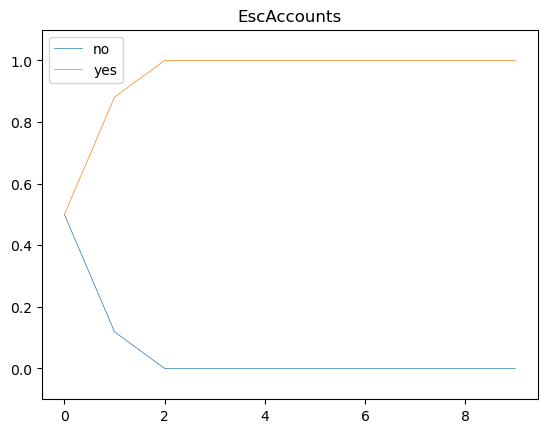

Showing ('EscAccounts', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for agent_j


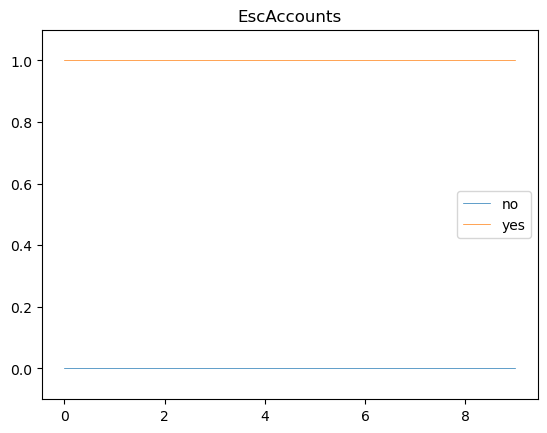

Showing ('AccFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('AccFound', ['no', 'yes']) for state:


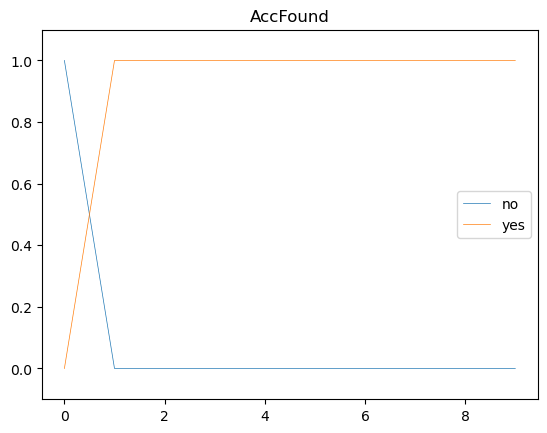

Showing ('AccFound', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,0.142857,0.857143
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.000000,1.000000


Plotting ('AccFound', ['no', 'yes']) for agent_i


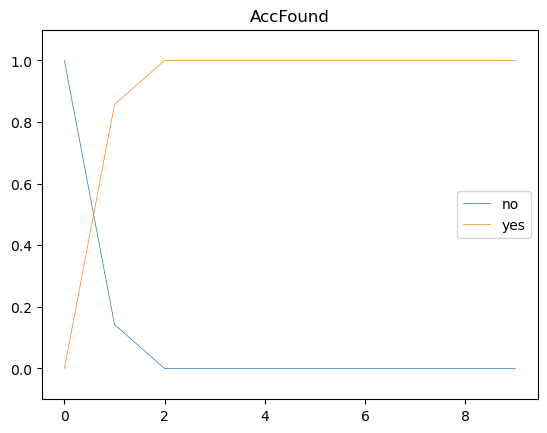

Showing ('AccFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,0.496000,0.504000
3,0.347687,0.652313
4,0.346968,0.653032
5,0.775068,0.224932
6,0.809793,0.190207
7,0.810226,0.189774
8,0.810226,0.189774
9,0.810226,0.189774


Plotting ('AccFound', ['no', 'yes']) for agent_j


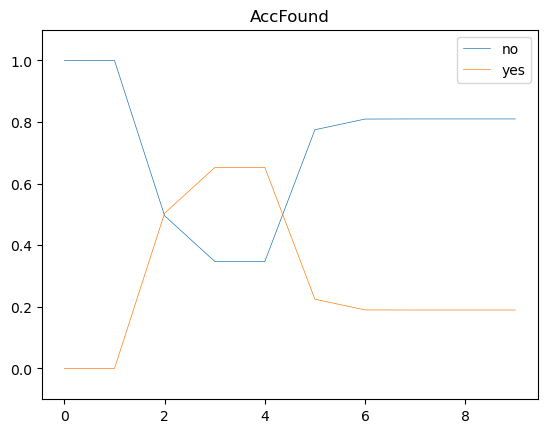

Showing ('DataFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataFound', ['no', 'yes']) for state:


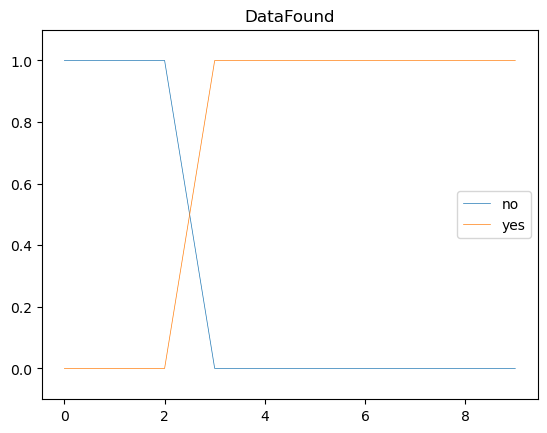

Showing ('DataFound', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,0.076923,0.923077
4,0.000042,0.999958
5,0.000042,0.999958
6,0.000042,0.999958
7,0.000042,0.999958
8,0.000042,0.999958
9,0.000042,0.999958


Plotting ('DataFound', ['no', 'yes']) for agent_i


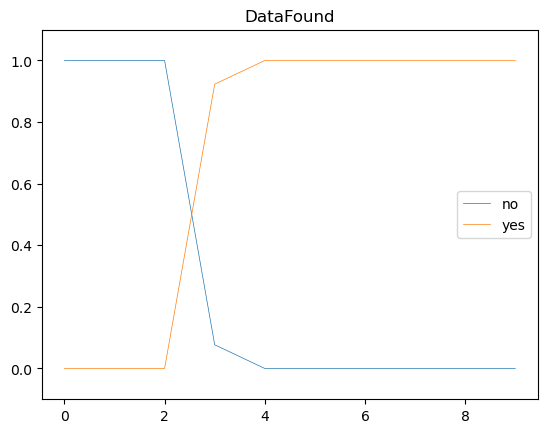

Showing ('DataFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,0.200000,0.800000
2,0.200000,0.800000
3,0.542920,0.457080
4,0.519883,0.480117
5,0.425283,0.574717
6,0.436658,0.563342
7,0.436857,0.563143
8,0.436857,0.563142
9,0.436858,0.563143


Plotting ('DataFound', ['no', 'yes']) for agent_j


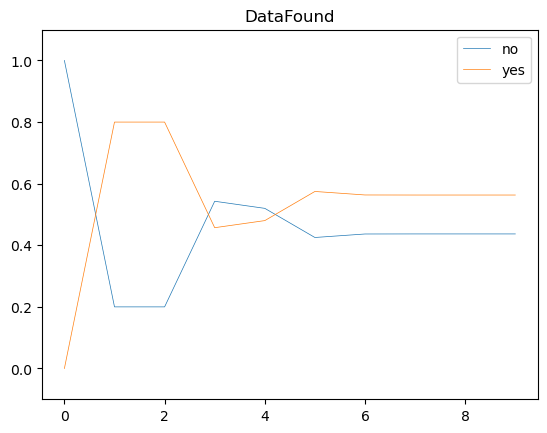

Showing ('AccessLevel', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccessLevel', ['root', 'user']) for state:


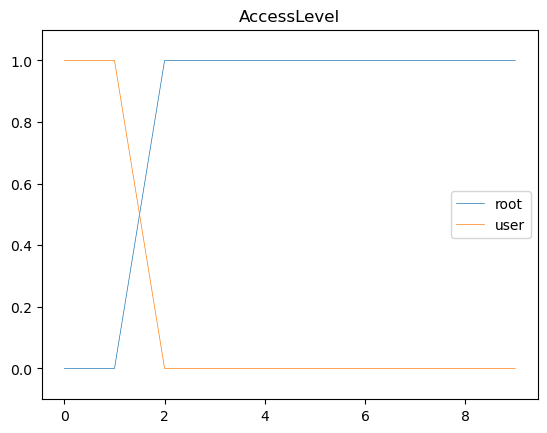

Showing ('AccessLevel', ['root', 'user']) for agent_i


,root,user
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccessLevel', ['root', 'user']) for agent_i


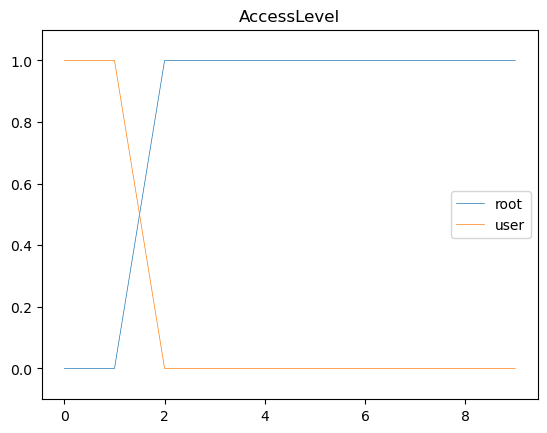

Showing ('AccessLevel', ['root', 'user']) for agent_j


,root,user
0,0.000000,1.000000
1,0.000000,1.000000
2,0.000000,1.000000
3,0.259164,0.740836
4,0.587082,0.412918
5,0.079049,0.920951
6,0.037788,0.962212
7,0.037273,0.962727
8,0.037273,0.962727
9,0.037273,0.962727


Plotting ('AccessLevel', ['root', 'user']) for agent_j


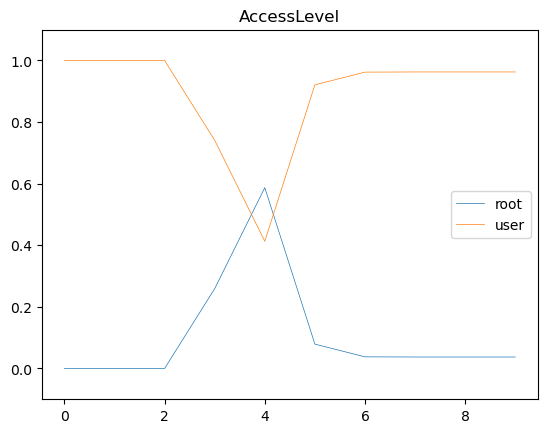

Showing ('AttActive', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for state:


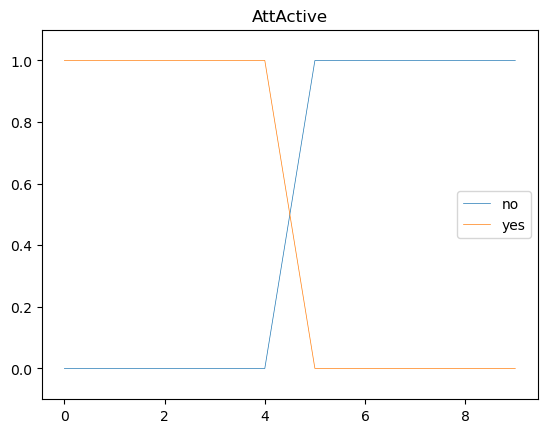

Showing ('AttActive', ['no', 'yes']) for agent_i


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for agent_i


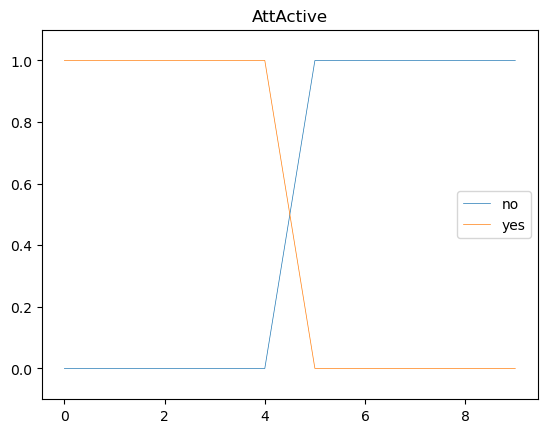

Showing ('AttActive', ['no', 'yes']) for agent_j


,no,yes
0,0.000000,1.000000e+00
1,0.000000,1.000000e+00
2,0.297000,7.030000e-01
3,0.276396,7.236037e-01
4,0.402911,5.970893e-01
5,0.922879,7.712125e-02
6,0.997200,2.800148e-03
7,0.999967,3.342731e-05
8,0.999997,2.427107e-06
9,1.000000,2.743902e-10


Plotting ('AttActive', ['no', 'yes']) for agent_j


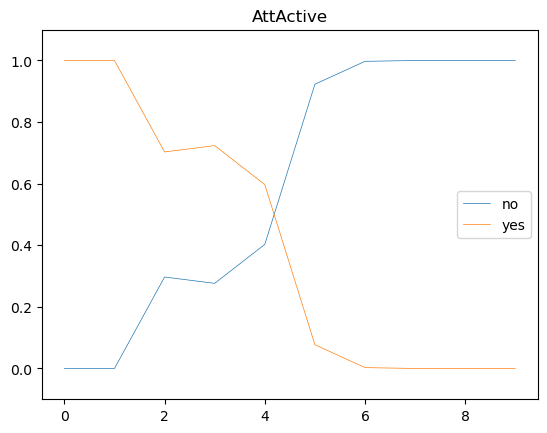

Showing ('DataInjected', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataInjected', ['no', 'yes']) for state:


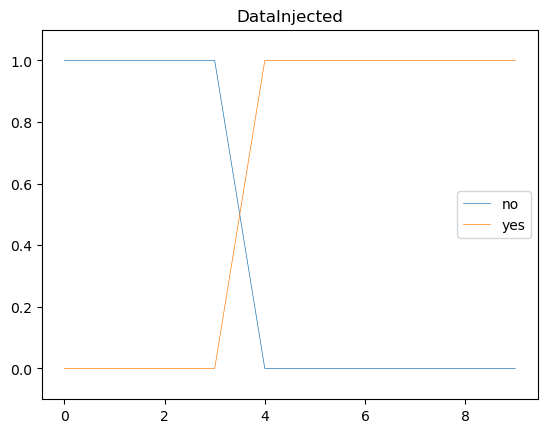

Showing ('DataInjected', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,0.000042,0.999958
5,0.000042,0.999958
6,0.000042,0.999958
7,0.000042,0.999958
8,0.000042,0.999958
9,0.000042,0.999958


Plotting ('DataInjected', ['no', 'yes']) for agent_i


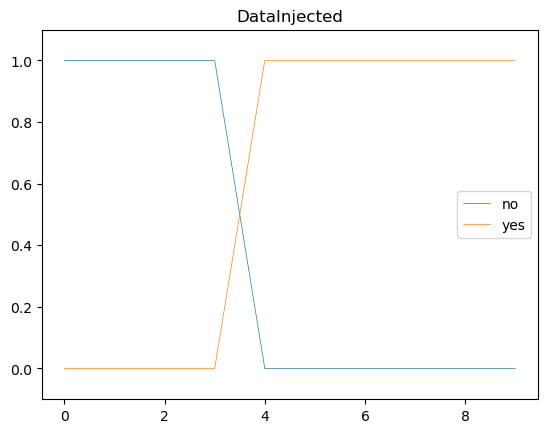

Showing ('DataInjected', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,1.000000,0.000000
5,0.970031,0.029970
6,0.966591,0.033409
7,0.966545,0.033455
8,0.966543,0.033457
9,0.966543,0.033457


Plotting ('DataInjected', ['no', 'yes']) for agent_j


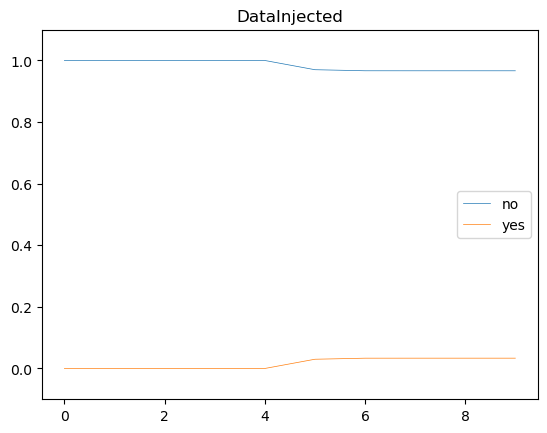

=============== End interaction trace


,i_acts,"[""AccessPerm'"", ""HostObs'"", ""ActionResult'"", ""ConnStatus'"", ""DefenseObs'""]",j_acts,"[""EndPtAlerts'""]"
0,EnumAccounts,denied|user_files|success|active|perms_change,RestrictAccPrivs,file_enum
1,PrivEscAcc,auth|none|failure|active|none,Nop,login_activity
2,FileRecon,auth|none|failure|active|none,Nop,file_enum
3,FileRecon,auth|user_files|success|active|none,Nop,file_enum
4,ManipulateData,auth|user_files|success|active|none,Nop,file_write
5,Exit,auth|none|success|terminated|none,Nop,login_activity
6,Nop,denied|none|failure|terminated|none,Nop,none
7,Nop,auth|user_files|failure|terminated|none,Nop,none
8,Nop,auth|user_files|success|terminated|none,Nop,none
9,Nop,denied|none|success|terminated|none,Nop,none


Agent i's P(Aj)


,DecoyAccount,DeployData,LockAccounts,Nop,RestrictAccPrivs
0,0.0,0.0,0.000000,0.500000,0.5
1,0.0,0.0,0.000000,1.000000,0.0
2,0.0,0.0,0.500000,0.500000,0.0
3,0.0,0.0,0.040595,0.959405,0.0
4,0.0,0.0,0.001900,0.998100,0.0
5,0.0,0.0,0.000000,1.000000,0.0
6,0.0,0.0,0.000000,1.000000,0.0
7,0.0,0.0,0.000000,1.000000,0.0
8,0.0,0.0,0.000000,1.000000,0.0
9,0.0,0.0,0.000000,1.000000,0.0


Agent j's P(Aj)


,EnumAccounts,Exit,FileRecon,ManipulateData,Nop,PrivEscAcc
0,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
1,0.630000,2.970000e-01,6.300000e-02,1.000000e-02,0.000000,0.000000
2,0.046890,1.867600e-01,0.000000e+00,3.150000e-03,0.297000,0.466200
3,0.000899,1.265143e-01,2.591644e-01,0.000000e+00,0.276396,0.337026
4,0.000000,5.380390e-03,1.621835e-01,7.521768e-01,0.078068,0.002191
5,0.000000,9.801734e-01,3.253091e-03,1.017150e-02,0.006402,0.000000
6,0.000000,1.067778e-02,1.314675e-04,2.615346e-03,0.986575,0.000000
7,0.000000,1.556338e-04,1.824856e-07,6.179813e-06,0.999838,0.000000
8,0.000000,3.656518e-07,0.000000e+00,8.603277e-09,1.000000,0.000000
9,0.000000,5.060751e-10,0.000000e+00,0.000000e+00,1.000000,0.000000


,highCap,lowCap
0,0.500000,0.500000
1,0.500000,0.500000
2,0.500000,0.500000
3,0.047619,0.952381
4,0.009417,0.990583
5,0.007626,0.992374
6,0.007626,0.992374
7,0.007626,0.992374
8,0.007626,0.992374
9,0.007626,0.992374


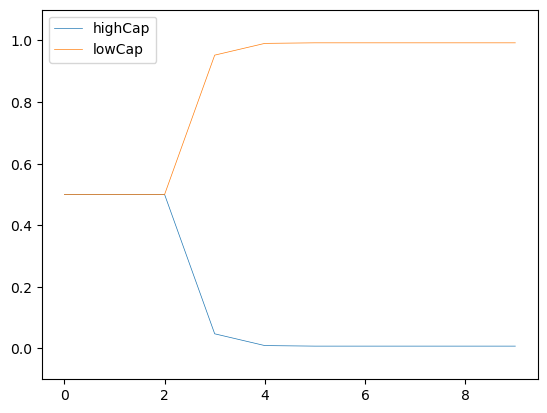

,att
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


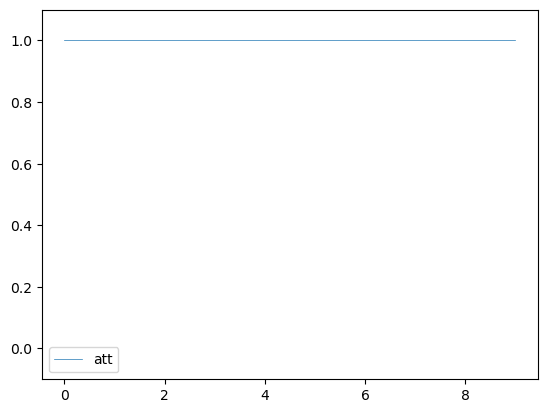

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


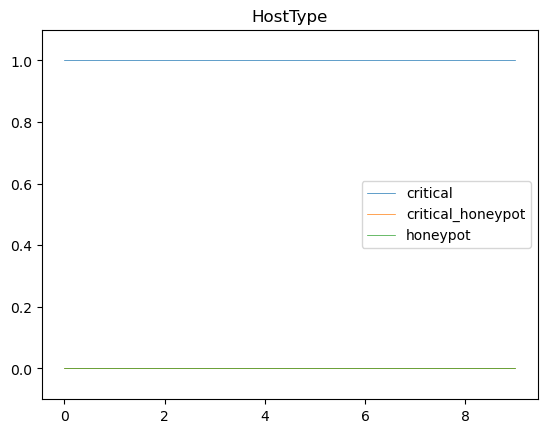

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


,critical,critical_honeypot,honeypot
0,0.5,0.0,0.5
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


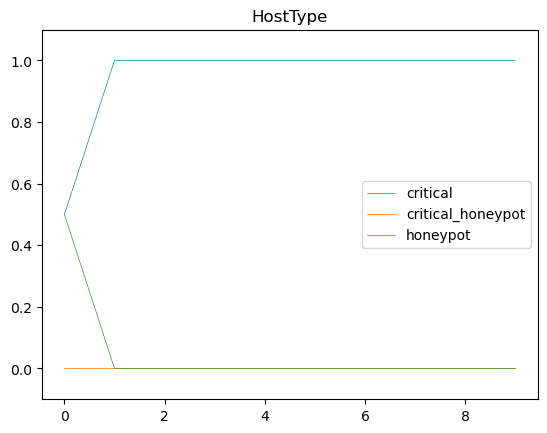

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


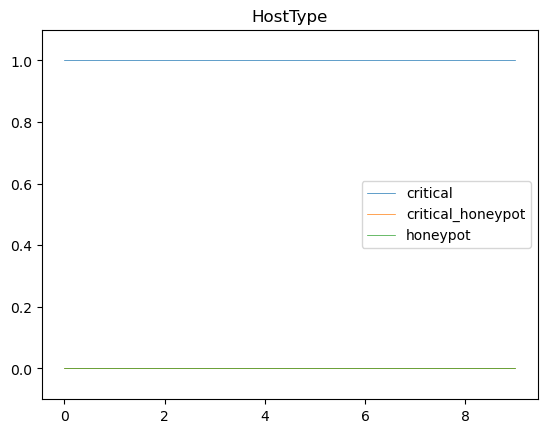

Showing ('HostHasData', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for state:


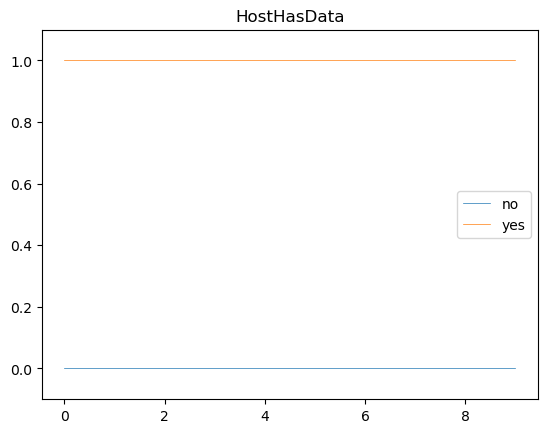

Showing ('HostHasData', ['no', 'yes']) for agent_i


,no,yes
0,0.500000,0.500000
1,0.500000,0.500000
2,0.500000,0.500000
3,0.725807,0.274194
4,0.140449,0.859551
5,0.000082,0.999918
6,0.000082,0.999918
7,0.000082,0.999918
8,0.000082,0.999918
9,0.000082,0.999918


Plotting ('HostHasData', ['no', 'yes']) for agent_i


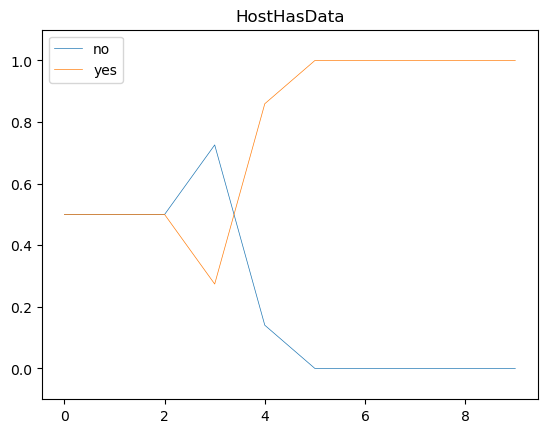

Showing ('HostHasData', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for agent_j


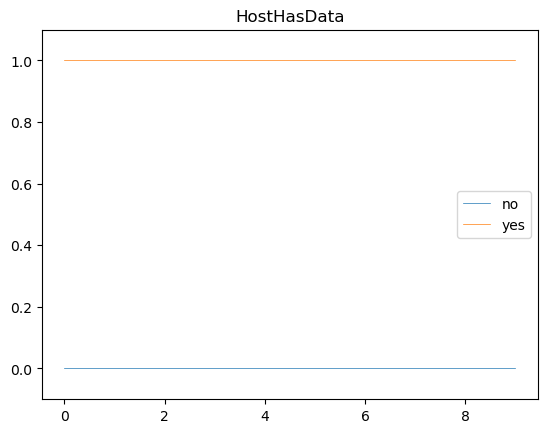

Showing ('DataPrivs', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('DataPrivs', ['root', 'user']) for state:


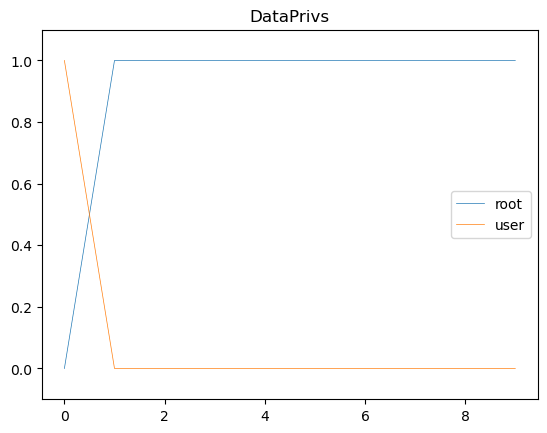

Showing ('DataPrivs', ['root', 'user']) for agent_i


,root,user
0,0.5,0.5
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('DataPrivs', ['root', 'user']) for agent_i


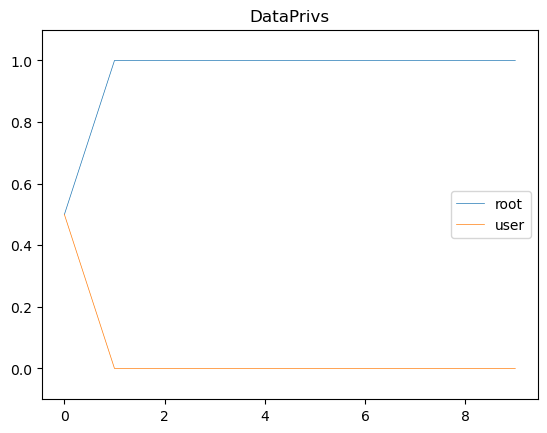

Showing ('DataPrivs', ['root', 'user']) for agent_j


,root,user
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('DataPrivs', ['root', 'user']) for agent_j


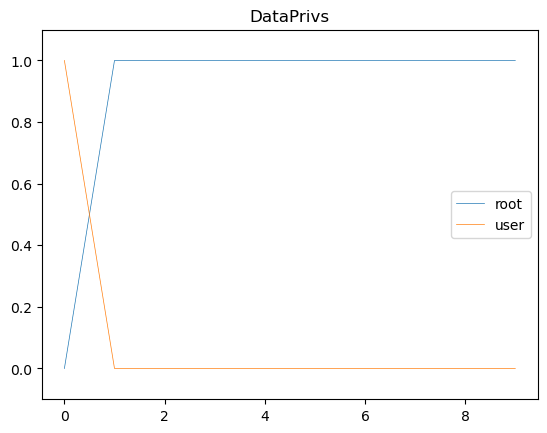

Showing ('EscAccounts', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for state:


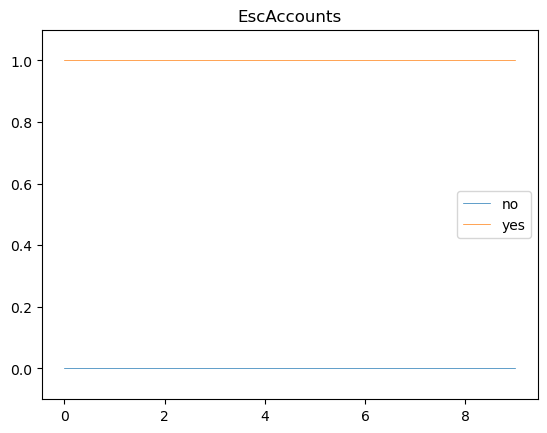

Showing ('EscAccounts', ['no', 'yes']) for agent_i


,no,yes
0,0.500000,0.500000
1,0.119048,0.880952
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.000000,1.000000


Plotting ('EscAccounts', ['no', 'yes']) for agent_i


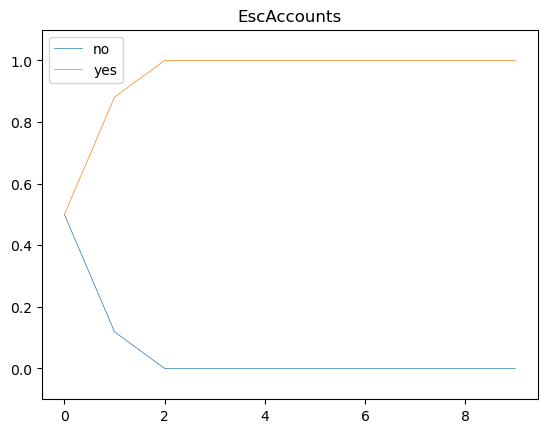

Showing ('EscAccounts', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for agent_j


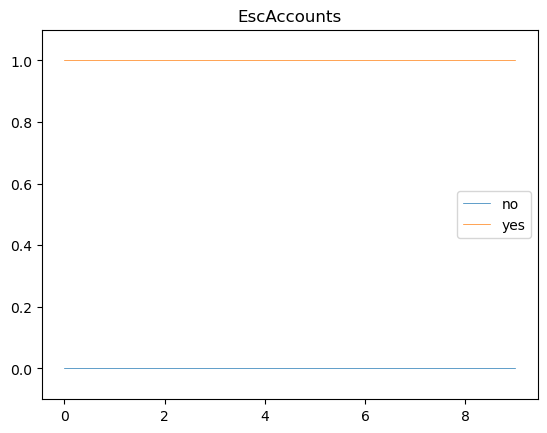

Showing ('AccFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('AccFound', ['no', 'yes']) for state:


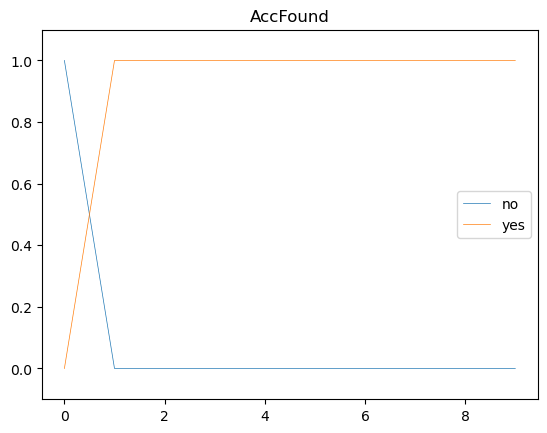

Showing ('AccFound', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,0.142857,0.857143
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.000000,1.000000


Plotting ('AccFound', ['no', 'yes']) for agent_i


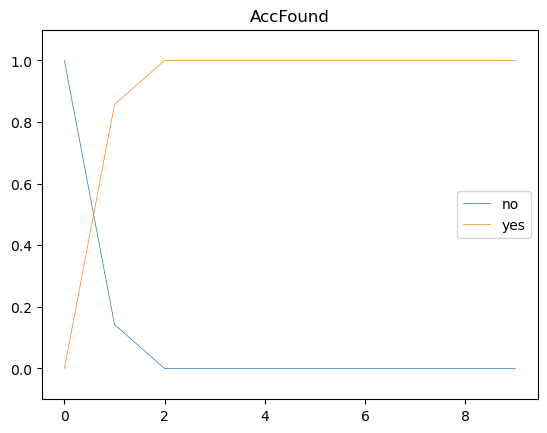

Showing ('AccFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,0.496000,0.504000
3,0.347687,0.652313
4,0.067786,0.932214
5,0.005200,0.994800
6,0.005200,0.994800
7,0.005214,0.994786
8,0.005214,0.994786
9,0.005214,0.994786


Plotting ('AccFound', ['no', 'yes']) for agent_j


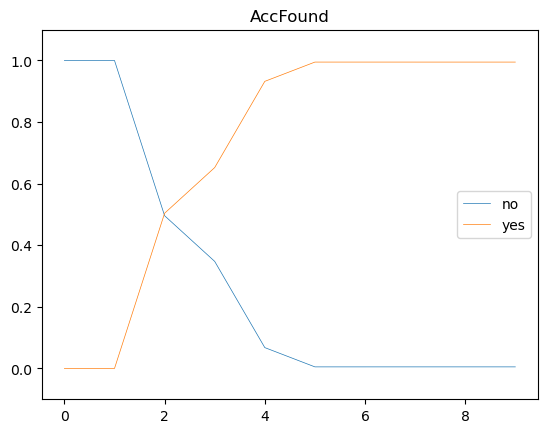

Showing ('DataFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataFound', ['no', 'yes']) for state:


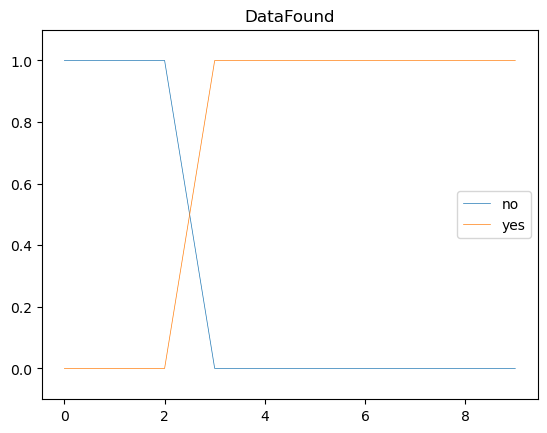

Showing ('DataFound', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,0.870968,0.129032
4,0.146067,0.853933
5,0.000086,0.999914
6,0.000086,0.999914
7,0.000086,0.999914
8,0.000086,0.999914
9,0.000086,0.999914


Plotting ('DataFound', ['no', 'yes']) for agent_i


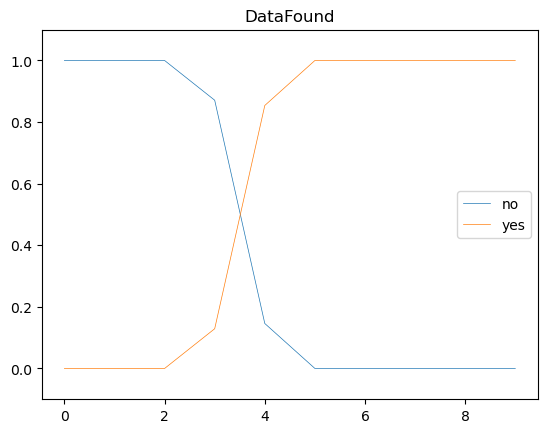

Showing ('DataFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,0.200000,0.800000
2,0.200000,0.800000
3,0.542920,0.457080
4,0.121374,0.878626
5,0.005645,0.994355
6,0.004175,0.995825
7,0.004089,0.995911
8,0.004089,0.995911
9,0.004089,0.995911


Plotting ('DataFound', ['no', 'yes']) for agent_j


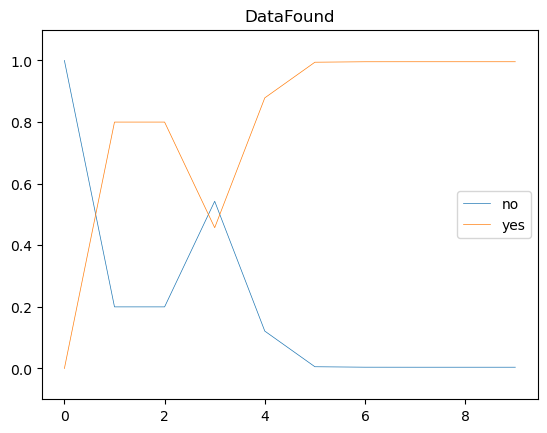

Showing ('AccessLevel', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccessLevel', ['root', 'user']) for state:


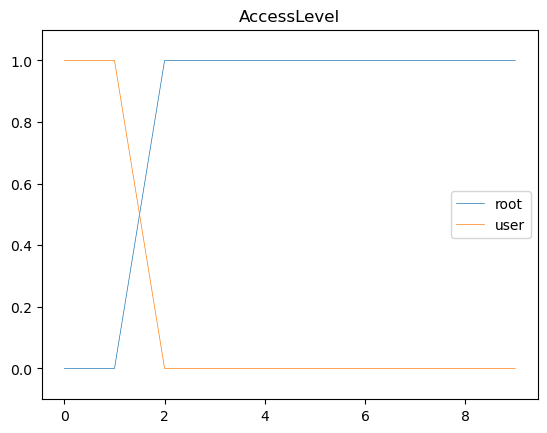

Showing ('AccessLevel', ['root', 'user']) for agent_i


,root,user
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccessLevel', ['root', 'user']) for agent_i


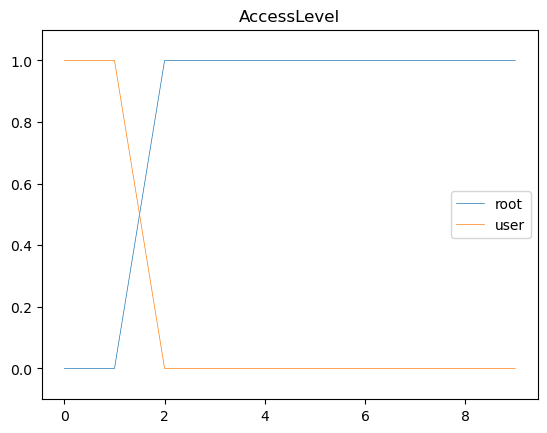

Showing ('AccessLevel', ['root', 'user']) for agent_j


,root,user
0,0.000000,1.000000
1,0.000000,1.000000
2,0.000000,1.000000
3,0.259164,0.740836
4,0.917206,0.082794
5,0.993812,0.006188
6,0.993812,0.006188
7,0.993796,0.006204
8,0.993796,0.006204
9,0.993796,0.006204


Plotting ('AccessLevel', ['root', 'user']) for agent_j


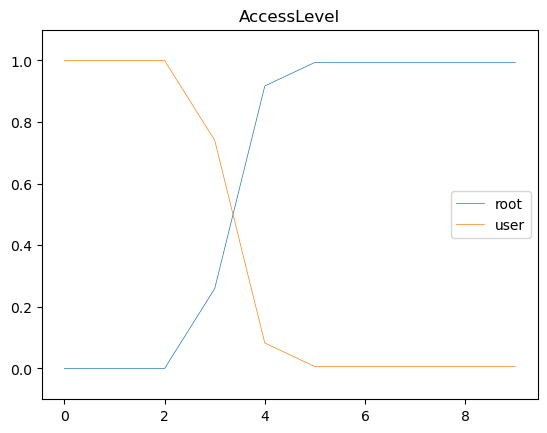

Showing ('AttActive', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for state:


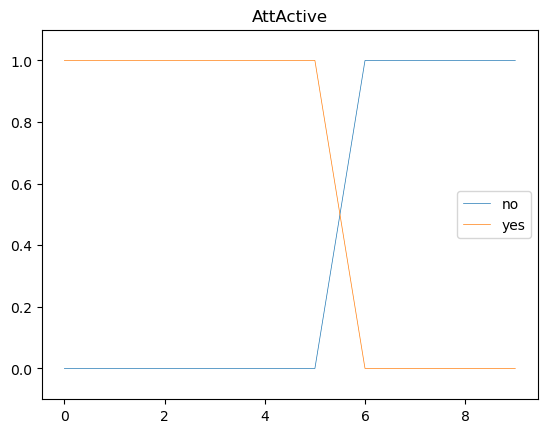

Showing ('AttActive', ['no', 'yes']) for agent_i


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for agent_i


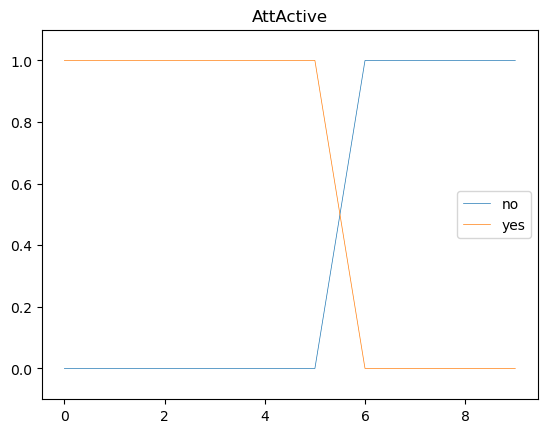

Showing ('AttActive', ['no', 'yes']) for agent_j


,no,yes
0,0.000000,1.000000e+00
1,0.000000,1.000000e+00
2,0.297000,7.030000e-01
3,0.276396,7.236037e-01
4,0.078068,9.219320e-01
5,0.006402,9.935980e-01
6,0.986575,1.342459e-02
7,0.999838,1.619960e-04
8,1.000000,3.742551e-07
9,1.000000,5.060751e-10


Plotting ('AttActive', ['no', 'yes']) for agent_j


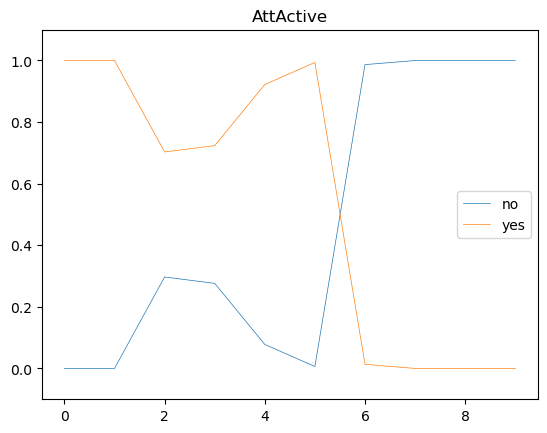

Showing ('DataInjected', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataInjected', ['no', 'yes']) for state:


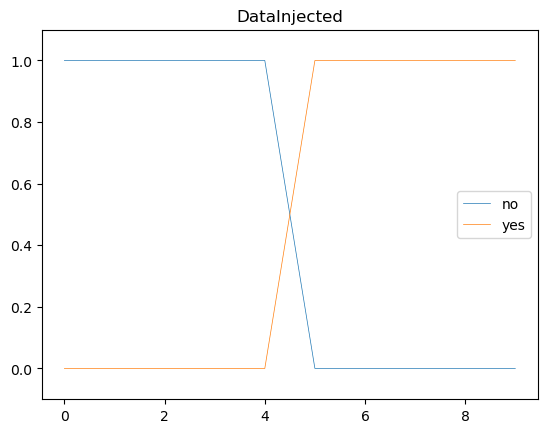

Showing ('DataInjected', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,1.000000,0.000000
5,0.000086,0.999914
6,0.000086,0.999914
7,0.000086,0.999914
8,0.000086,0.999914
9,0.000086,0.999914


Plotting ('DataInjected', ['no', 'yes']) for agent_i


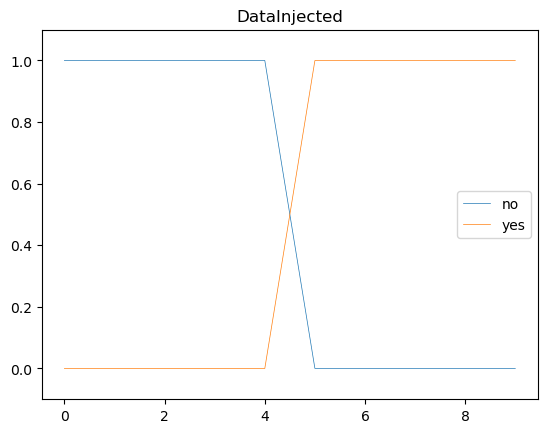

Showing ('DataInjected', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,1.000000,0.000000
5,0.020249,0.979750
6,0.010138,0.989862
7,0.008041,0.991959
8,0.008035,0.991966
9,0.008035,0.991965


Plotting ('DataInjected', ['no', 'yes']) for agent_j


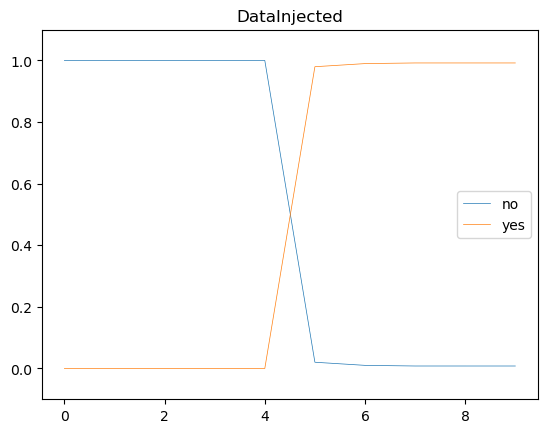

=============== End interaction trace


,i_acts,"[""AccessPerm'"", ""HostObs'"", ""ActionResult'"", ""ConnStatus'"", ""DefenseObs'""]",j_acts,"[""EndPtAlerts'""]"
0,EnumAccounts,denied|none|success|active|acc_policy_change,RestrictAccPrivs,file_enum
1,PrivEscAcc,auth|user_files|success|active|none,Nop,login_activity
2,FileRecon,denied|user_files|failure|active|none,Nop,file_enum
3,FileRecon,auth|none|success|active|none,Nop,file_enum
4,ManipulateData,auth|none|success|active|none,Nop,none
5,Exit,auth|none|failure|terminated|none,Nop,none
6,Nop,auth|none|success|terminated|none,Nop,none
7,Nop,auth|none|failure|terminated|none,Nop,none
8,Nop,auth|user_files|success|terminated|none,Nop,none
9,Nop,denied|none|success|terminated|none,Nop,none


Agent i's P(Aj)


,DecoyAccount,DeployData,LockAccounts,Nop,RestrictAccPrivs
0,0.0,0.0,0.000000,0.500000,0.5
1,0.0,0.0,0.000000,1.000000,0.0
2,0.0,0.0,0.500000,0.500000,0.0
3,0.0,0.0,0.040595,0.959405,0.0
4,0.0,0.0,0.001900,0.998100,0.0
5,0.0,0.0,0.000000,1.000000,0.0
6,0.0,0.0,0.000000,1.000000,0.0
7,0.0,0.0,0.000000,1.000000,0.0
8,0.0,0.0,0.000000,1.000000,0.0
9,0.0,0.0,0.000000,1.000000,0.0


Agent j's P(Aj)


,EnumAccounts,Exit,FileRecon,ManipulateData,Nop,PrivEscAcc
0,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
1,0.630000,2.970000e-01,6.300000e-02,1.000000e-02,0.000000,0.000000
2,0.046890,1.867600e-01,0.000000e+00,3.150000e-03,0.297000,0.466200
3,0.000899,1.265143e-01,2.591644e-01,0.000000e+00,0.276396,0.337026
4,0.000000,5.380390e-03,1.621835e-01,7.521768e-01,0.078068,0.002191
5,0.000000,3.257126e-01,1.000850e-02,5.677679e-02,0.607502,0.000000
6,0.000000,3.641530e-03,4.606269e-05,5.044519e-04,0.995808,0.000000
7,0.000000,3.017543e-05,6.380580e-08,2.160762e-06,0.999968,0.000000
8,0.000000,1.278491e-07,0.000000e+00,3.008111e-09,1.000000,0.000000
9,0.000000,1.769477e-10,0.000000e+00,0.000000e+00,1.000000,0.000000


,highCap,lowCap
0,0.500000,0.500000
1,0.500000,0.500000
2,0.500000,0.500000
3,0.047619,0.952381
4,0.009417,0.990583
5,0.007626,0.992374
6,0.007626,0.992374
7,0.007626,0.992374
8,0.007626,0.992374
9,0.007626,0.992374


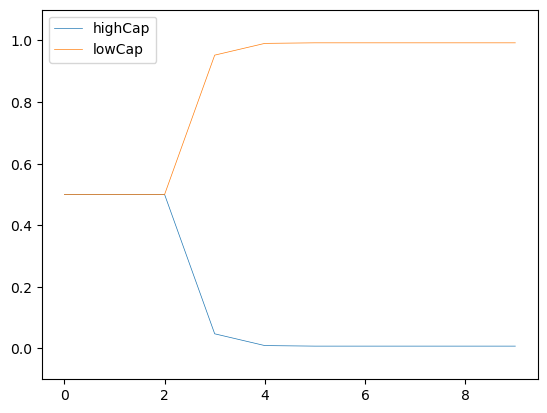

,att
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


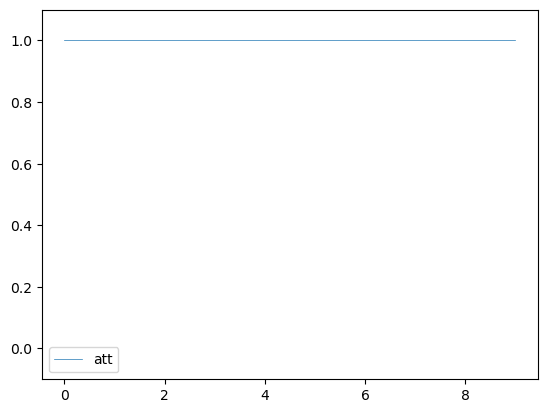

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


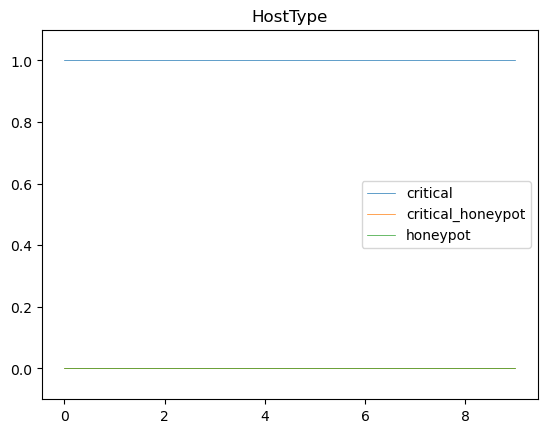

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


,critical,critical_honeypot,honeypot
0,0.5,0.0,0.5
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


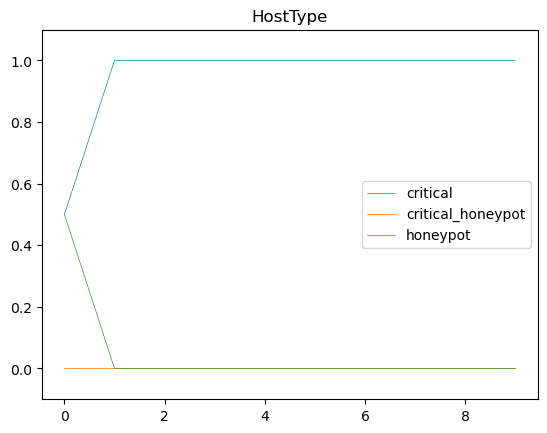

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


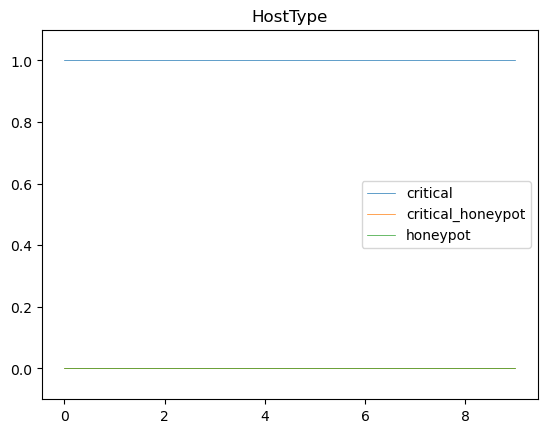

Showing ('HostHasData', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for state:


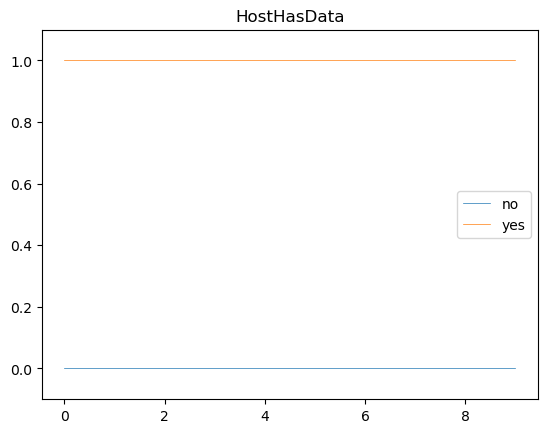

Showing ('HostHasData', ['no', 'yes']) for agent_i


,no,yes
0,0.500000,0.500000
1,0.500000,0.500000
2,0.500000,0.500000
3,0.833333,0.166667
4,0.255102,0.744898
5,0.000174,0.999826
6,0.000174,0.999826
7,0.000174,0.999826
8,0.000174,0.999826
9,0.000174,0.999826


Plotting ('HostHasData', ['no', 'yes']) for agent_i


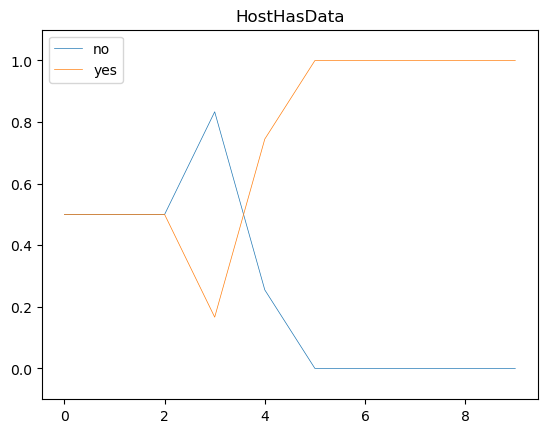

Showing ('HostHasData', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for agent_j


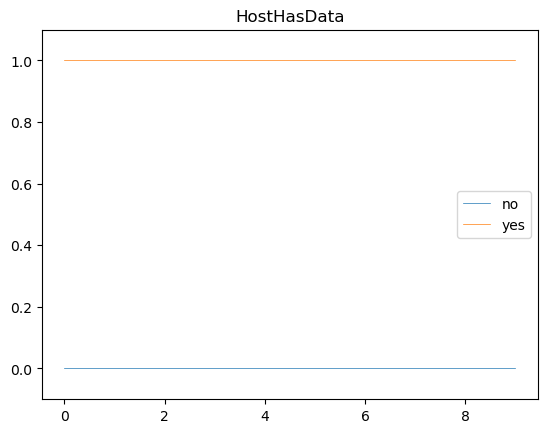

Showing ('DataPrivs', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('DataPrivs', ['root', 'user']) for state:


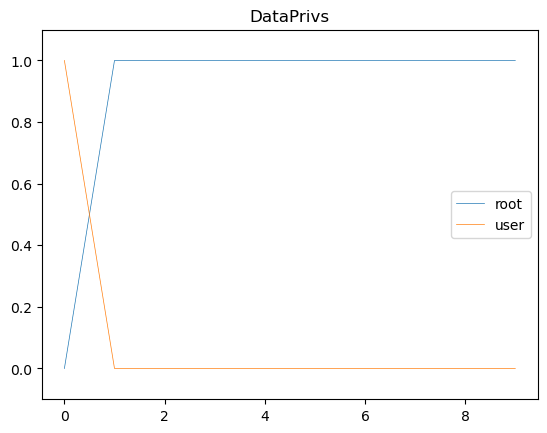

Showing ('DataPrivs', ['root', 'user']) for agent_i


,root,user
0,0.5,0.5
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('DataPrivs', ['root', 'user']) for agent_i


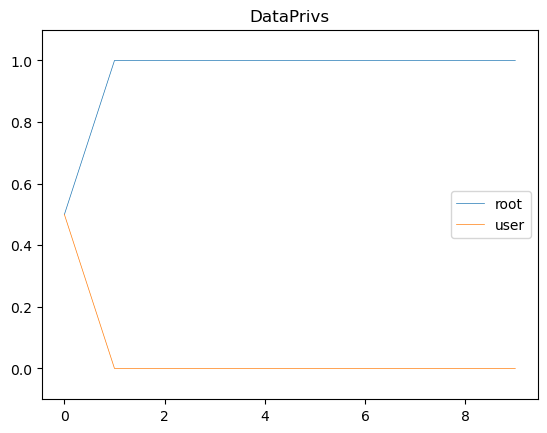

Showing ('DataPrivs', ['root', 'user']) for agent_j


,root,user
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('DataPrivs', ['root', 'user']) for agent_j


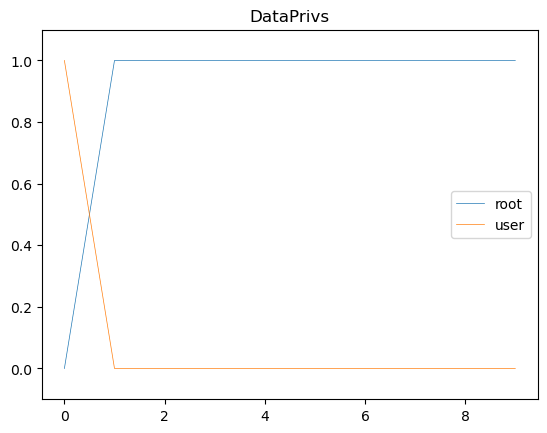

Showing ('EscAccounts', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for state:


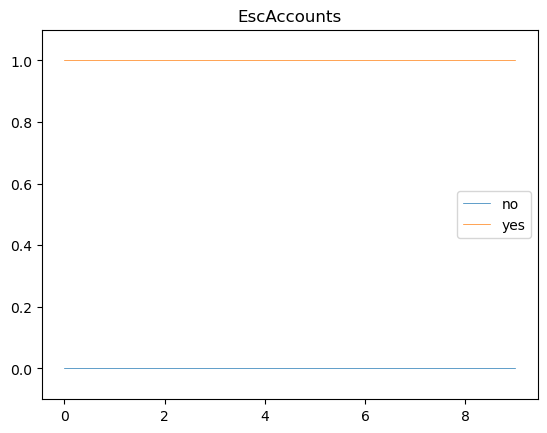

Showing ('EscAccounts', ['no', 'yes']) for agent_i


,no,yes
0,0.500000,0.500000
1,0.119048,0.880952
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.000000,1.000000


Plotting ('EscAccounts', ['no', 'yes']) for agent_i


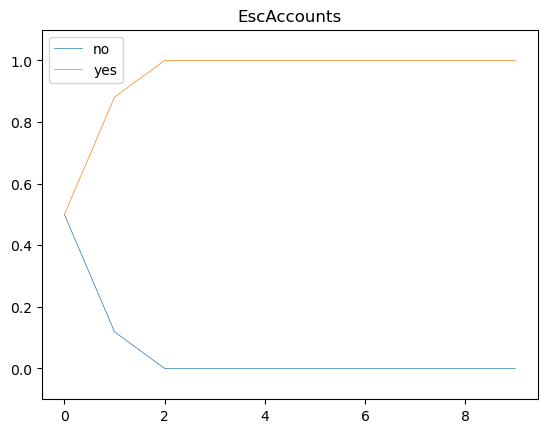

Showing ('EscAccounts', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for agent_j


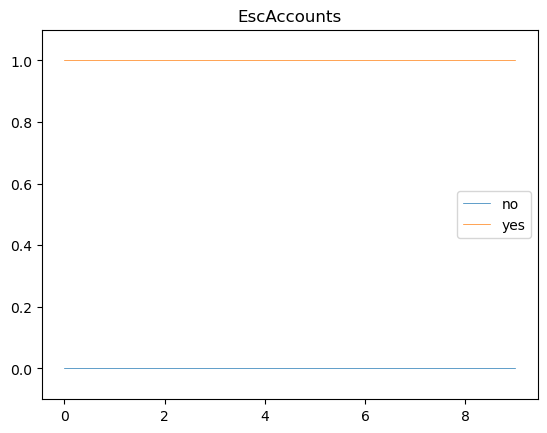

Showing ('AccFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('AccFound', ['no', 'yes']) for state:


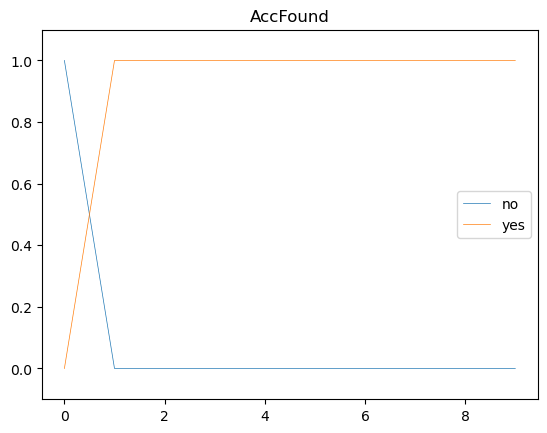

Showing ('AccFound', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,0.142857,0.857143
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.000000,1.000000


Plotting ('AccFound', ['no', 'yes']) for agent_i


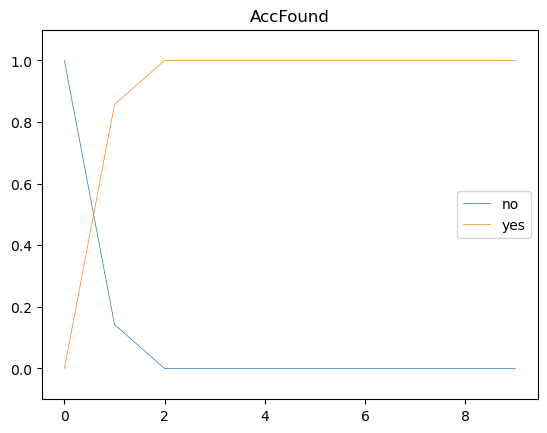

Showing ('AccFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,0.496000,0.504000
3,0.347687,0.652313
4,0.067786,0.932214
5,0.493074,0.506926
6,0.526146,0.473854
7,0.526419,0.473581
8,0.526420,0.473580
9,0.526420,0.473580


Plotting ('AccFound', ['no', 'yes']) for agent_j


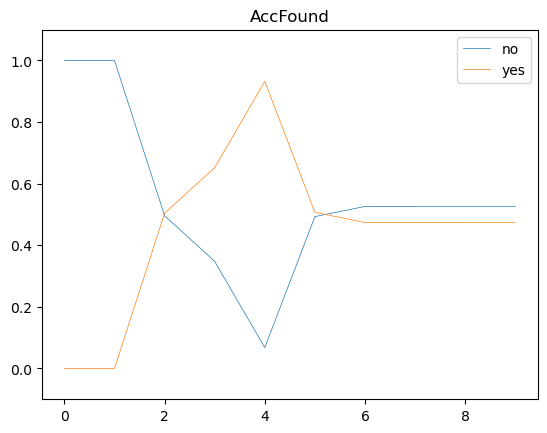

Showing ('DataFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataFound', ['no', 'yes']) for state:


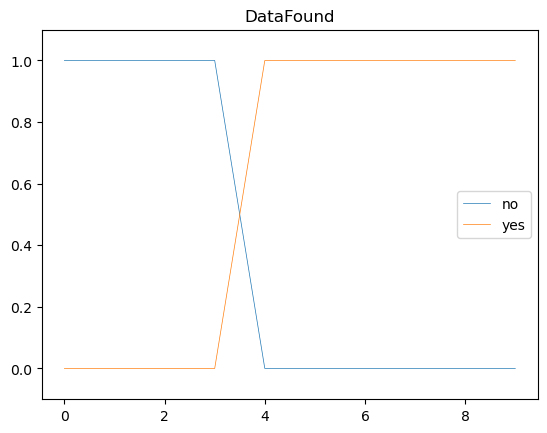

Showing ('DataFound', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,0.265306,0.734694
5,0.000181,0.999819
6,0.000181,0.999819
7,0.000181,0.999819
8,0.000181,0.999819
9,0.000181,0.999819


Plotting ('DataFound', ['no', 'yes']) for agent_i


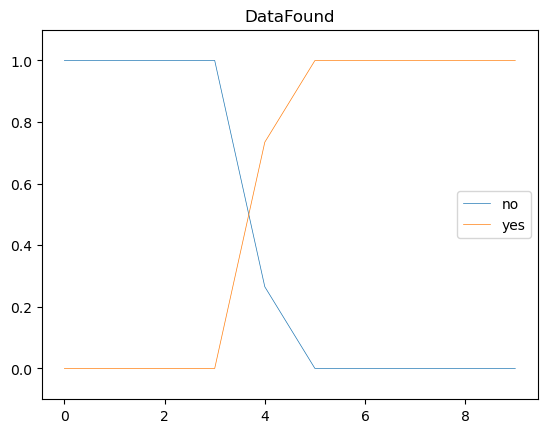

Showing ('DataFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,0.200000,0.800000
2,0.200000,0.800000
3,0.542920,0.457080
4,0.121374,0.878626
5,0.295796,0.704204
6,0.309274,0.690726
7,0.309403,0.690597
8,0.309404,0.690596
9,0.309404,0.690596


Plotting ('DataFound', ['no', 'yes']) for agent_j


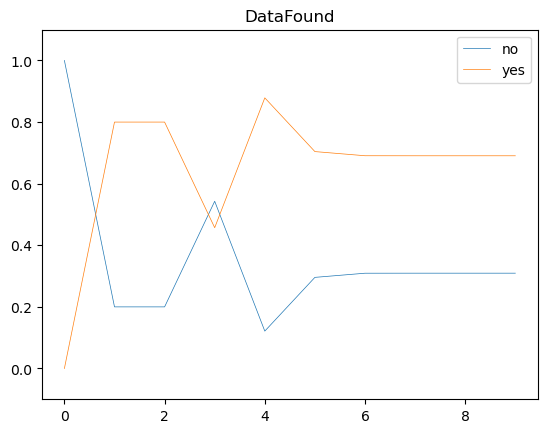

Showing ('AccessLevel', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccessLevel', ['root', 'user']) for state:


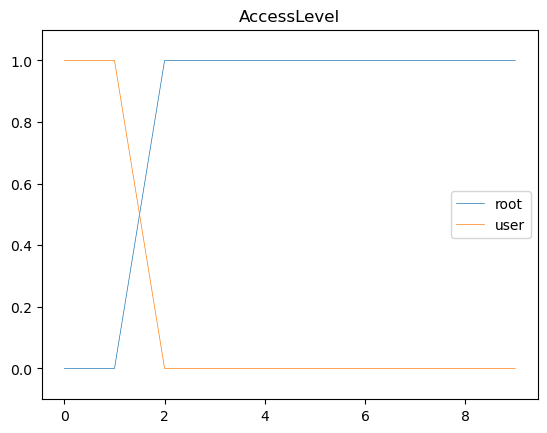

Showing ('AccessLevel', ['root', 'user']) for agent_i


,root,user
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccessLevel', ['root', 'user']) for agent_i


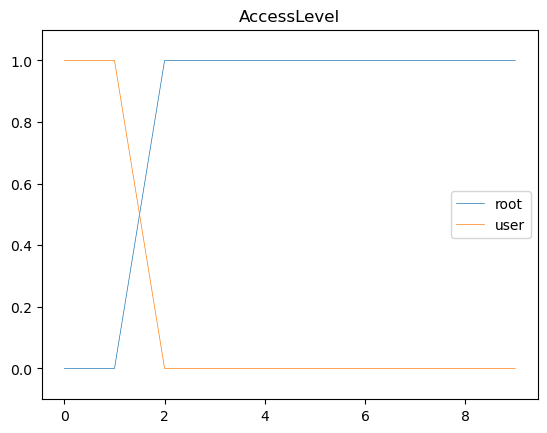

Showing ('AccessLevel', ['root', 'user']) for agent_j


,root,user
0,0.000000,1.000000
1,0.000000,1.000000
2,0.000000,1.000000
3,0.259164,0.740836
4,0.917206,0.082794
5,0.413188,0.586812
6,0.373829,0.626171
7,0.373504,0.626496
8,0.373503,0.626497
9,0.373503,0.626497


Plotting ('AccessLevel', ['root', 'user']) for agent_j


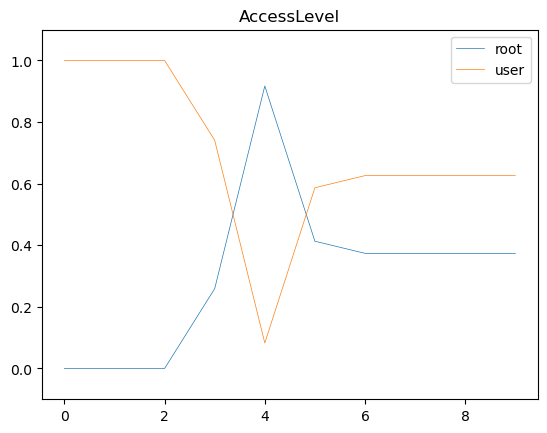

Showing ('AttActive', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for state:


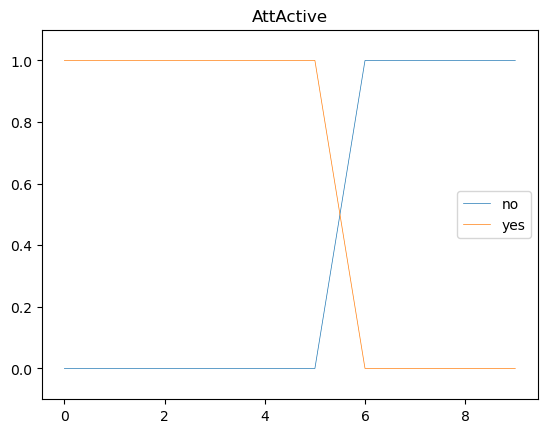

Showing ('AttActive', ['no', 'yes']) for agent_i


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for agent_i


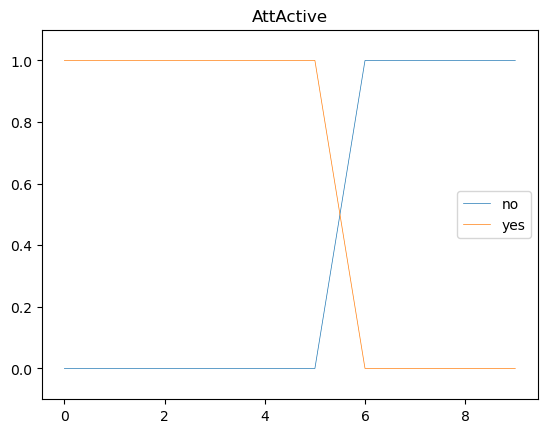

Showing ('AttActive', ['no', 'yes']) for agent_j


,no,yes
0,0.000000,1.000000e+00
1,0.000000,1.000000e+00
2,0.297000,7.030000e-01
3,0.276396,7.236037e-01
4,0.078068,9.219320e-01
5,0.607502,3.924979e-01
6,0.995808,4.192045e-03
7,0.999968,3.240000e-05
8,1.000000,1.308572e-07
9,1.000000,1.769477e-10


Plotting ('AttActive', ['no', 'yes']) for agent_j


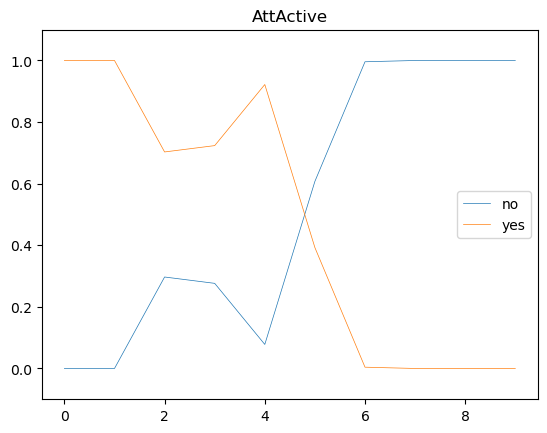

Showing ('DataInjected', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataInjected', ['no', 'yes']) for state:


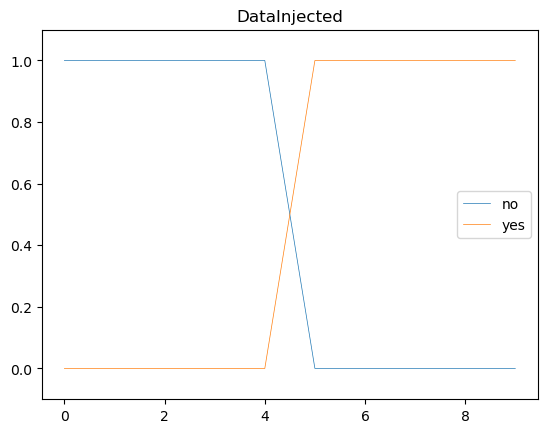

Showing ('DataInjected', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,1.000000,0.000000
5,0.000181,0.999819
6,0.000181,0.999819
7,0.000181,0.999819
8,0.000181,0.999819
9,0.000181,0.999819


Plotting ('DataInjected', ['no', 'yes']) for agent_i


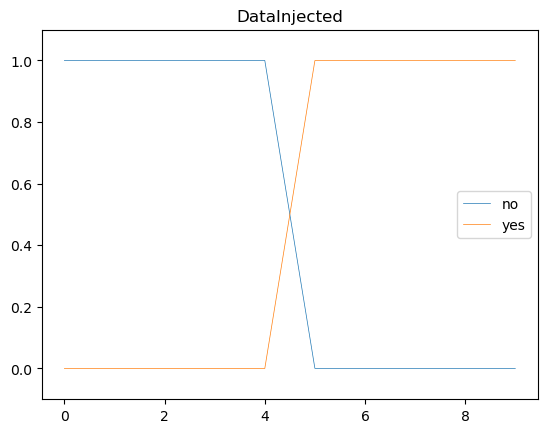

Showing ('DataInjected', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,1.000000,0.000000
5,0.678299,0.321701
6,0.653405,0.346595
7,0.653210,0.346790
8,0.653209,0.346791
9,0.653209,0.346791


Plotting ('DataInjected', ['no', 'yes']) for agent_j


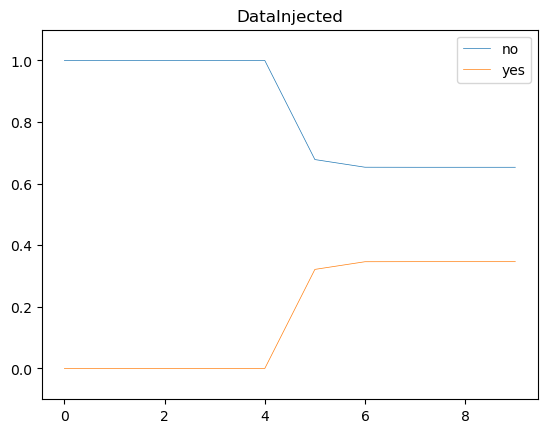

=============== End interaction trace


,i_acts,"[""AccessPerm'"", ""HostObs'"", ""ActionResult'"", ""ConnStatus'"", ""DefenseObs'""]",j_acts,"[""EndPtAlerts'""]"
0,EnumAccounts,denied|none|success|active|perms_change,RestrictAccPrivs,file_enum
1,PrivEscAcc,auth|user_files|failure|active|none,Nop,login_activity
2,FileRecon,auth|user_files|success|active|none,Nop,file_enum
3,ManipulateData,auth|user_files|success|active|none,Nop,file_write
4,Exit,denied|none|success|terminated|none,Nop,none
5,Nop,auth|user_files|failure|terminated|none,Nop,none
6,Nop,denied|none|failure|terminated|none,Nop,file_write
7,Nop,denied|none|failure|terminated|none,Nop,none
8,Nop,denied|none|success|terminated|none,Nop,file_enum
9,Nop,denied|none|failure|terminated|none,Nop,none


Agent i's P(Aj)


,DecoyAccount,DeployData,LockAccounts,Nop,RestrictAccPrivs
0,0.0,0.0,0.000000,0.500000,0.5
1,0.0,0.0,0.000000,1.000000,0.0
2,0.0,0.0,0.500000,0.500000,0.0
3,0.0,0.0,0.040595,0.959405,0.0
4,0.0,0.0,0.000112,0.999888,0.0
5,0.0,0.0,0.000000,1.000000,0.0
6,0.0,0.0,0.000000,1.000000,0.0
7,0.0,0.0,0.000000,1.000000,0.0
8,0.0,0.0,0.000000,1.000000,0.0
9,0.0,0.0,0.000000,1.000000,0.0


Agent j's P(Aj)


,EnumAccounts,Exit,FileRecon,ManipulateData,Nop,PrivEscAcc
0,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000
1,0.630000,2.970000e-01,6.300000e-02,1.000000e-02,0.000000,0.000000
2,0.046890,1.867600e-01,0.000000e+00,3.150000e-03,0.297000,0.466200
3,0.000899,1.265143e-01,2.591644e-01,0.000000e+00,0.276396,0.337026
4,0.000000,1.020642e-02,3.578650e-01,2.283527e-01,0.402911,0.000665
5,0.000000,3.155999e-02,1.066589e-02,3.489537e-02,0.922879,0.000000
6,0.000000,2.232187e-03,5.135435e-05,5.166063e-04,0.997200,0.000000
7,0.000000,8.719719e-03,7.202706e-07,4.080262e-05,0.991239,0.000000
8,0.000000,2.410858e-06,0.000000e+00,3.176087e-08,0.999998,0.000000
9,0.000000,3.176087e-08,0.000000e+00,0.000000e+00,1.000000,0.000000


,highCap,lowCap
0,0.500000,0.500000
1,0.500000,0.500000
2,0.500000,0.500000
3,0.047619,0.952381
4,0.009417,0.990583
5,0.009417,0.990583
6,0.009417,0.990583
7,0.009417,0.990583
8,0.009417,0.990583
9,0.009417,0.990583


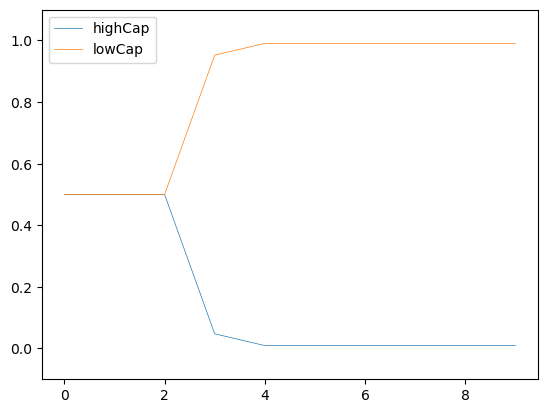

,att
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


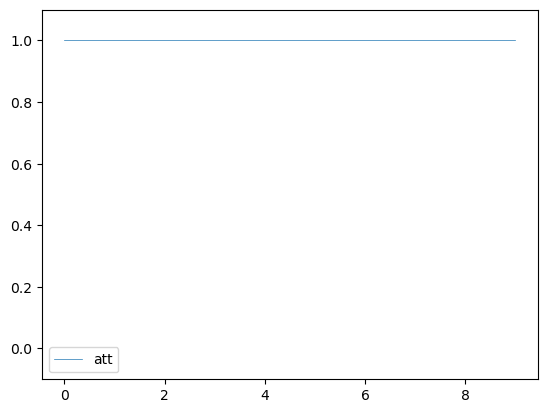

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for state:


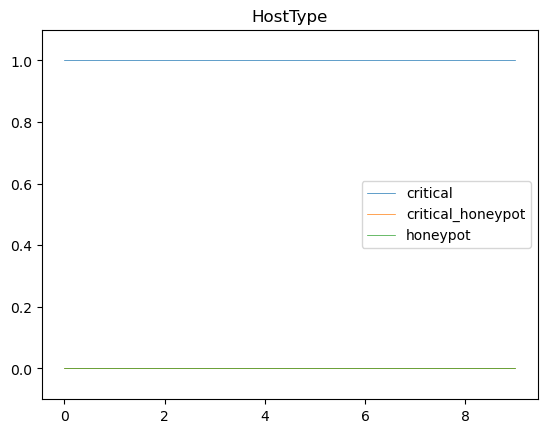

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


,critical,critical_honeypot,honeypot
0,0.5,0.0,0.5
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_i


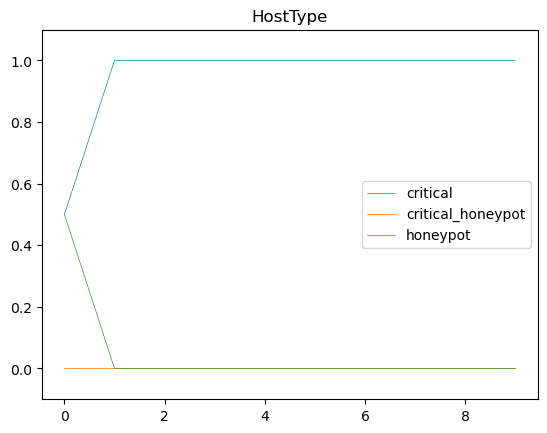

Showing ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


,critical,critical_honeypot,honeypot
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


Plotting ('HostType', ['critical', 'critical_honeypot', 'honeypot']) for agent_j


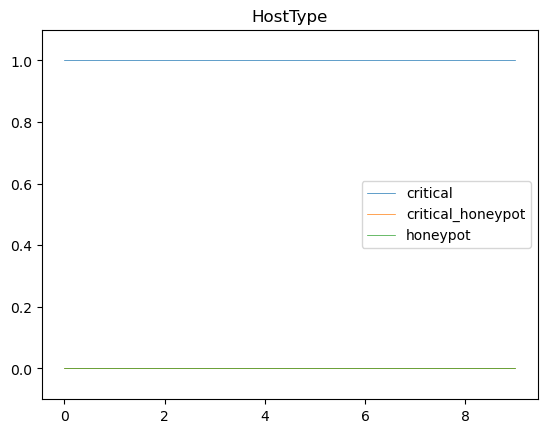

Showing ('HostHasData', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for state:


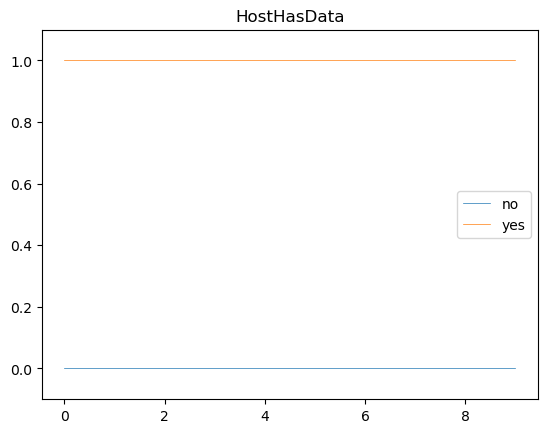

Showing ('HostHasData', ['no', 'yes']) for agent_i


,no,yes
0,0.500000,0.500000
1,0.500000,0.500000
2,0.500000,0.500000
3,0.064103,0.935897
4,0.000035,0.999965
5,0.000035,0.999965
6,0.000035,0.999965
7,0.000035,0.999965
8,0.000035,0.999965
9,0.000035,0.999965


Plotting ('HostHasData', ['no', 'yes']) for agent_i


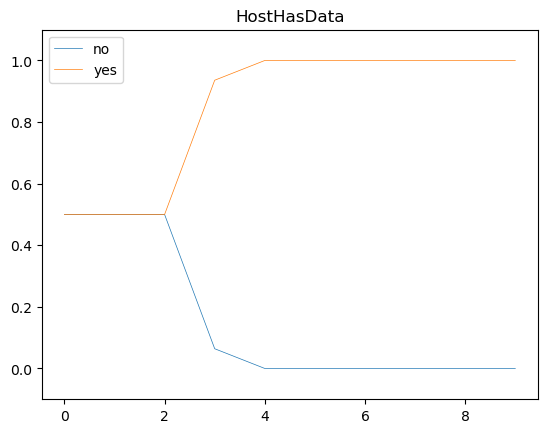

Showing ('HostHasData', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('HostHasData', ['no', 'yes']) for agent_j


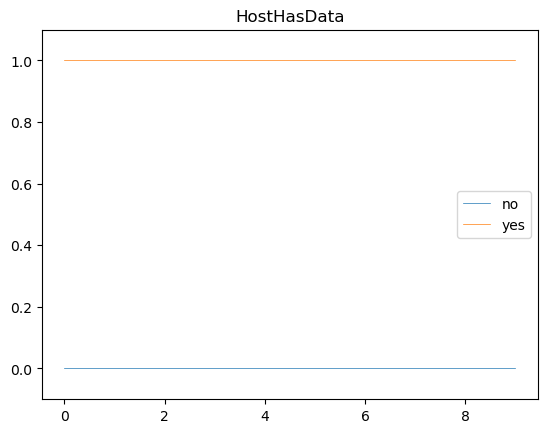

Showing ('DataPrivs', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('DataPrivs', ['root', 'user']) for state:


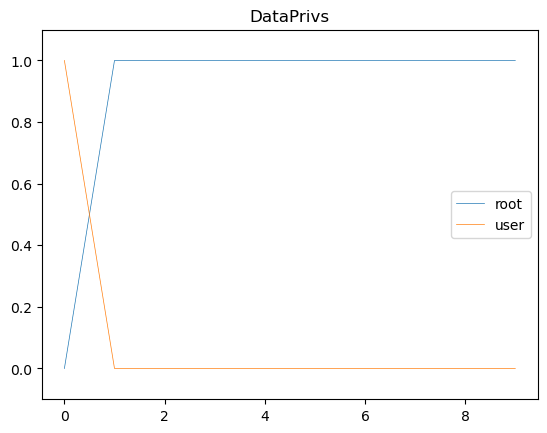

Showing ('DataPrivs', ['root', 'user']) for agent_i


,root,user
0,0.5,0.5
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('DataPrivs', ['root', 'user']) for agent_i


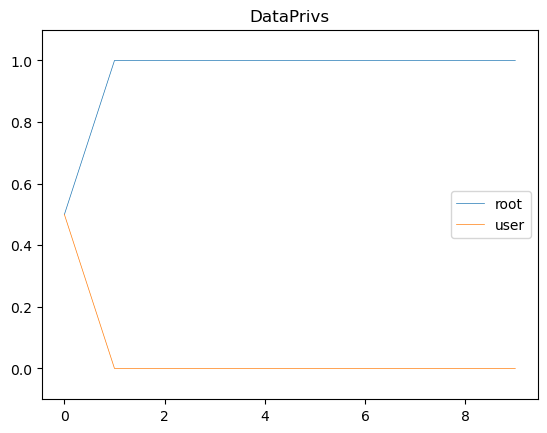

Showing ('DataPrivs', ['root', 'user']) for agent_j


,root,user
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('DataPrivs', ['root', 'user']) for agent_j


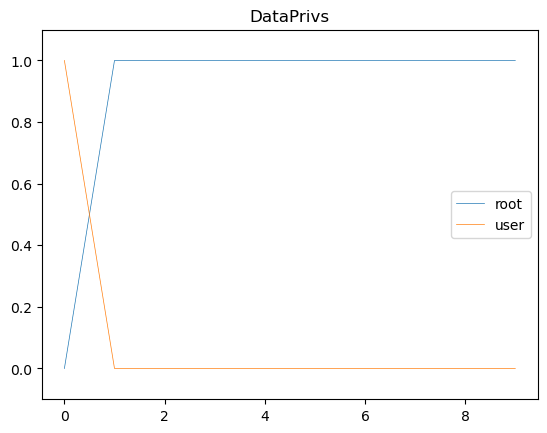

Showing ('EscAccounts', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for state:


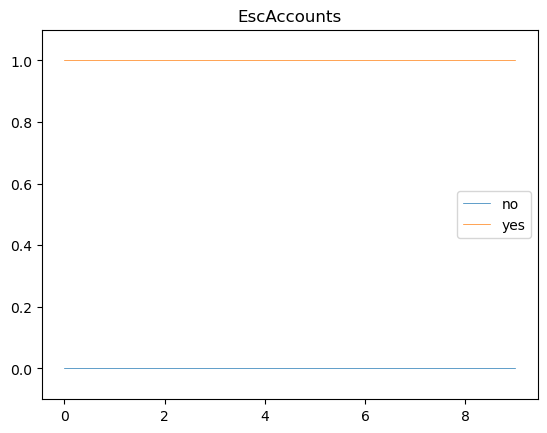

Showing ('EscAccounts', ['no', 'yes']) for agent_i


,no,yes
0,0.500000,0.500000
1,0.119048,0.880952
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.000000,1.000000


Plotting ('EscAccounts', ['no', 'yes']) for agent_i


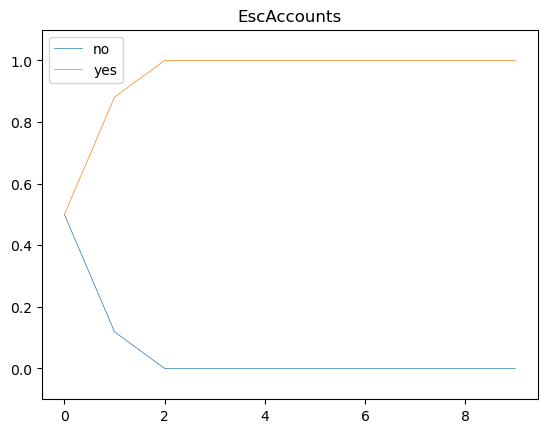

Showing ('EscAccounts', ['no', 'yes']) for agent_j


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('EscAccounts', ['no', 'yes']) for agent_j


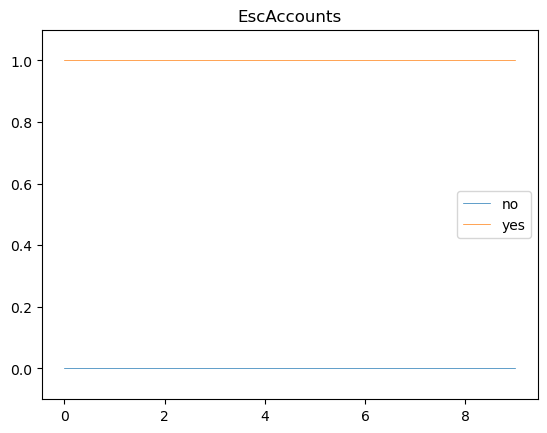

Showing ('AccFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('AccFound', ['no', 'yes']) for state:


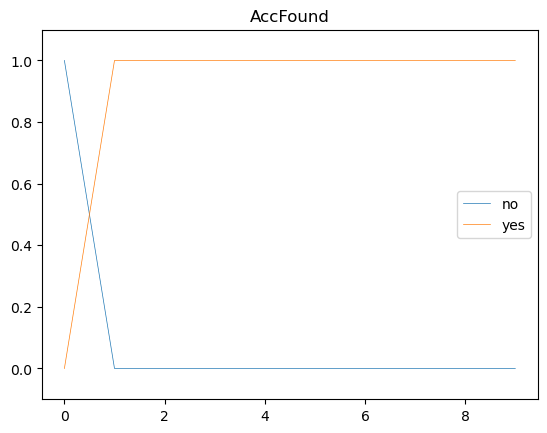

Showing ('AccFound', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,0.142857,0.857143
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,0.000000,1.000000


Plotting ('AccFound', ['no', 'yes']) for agent_i


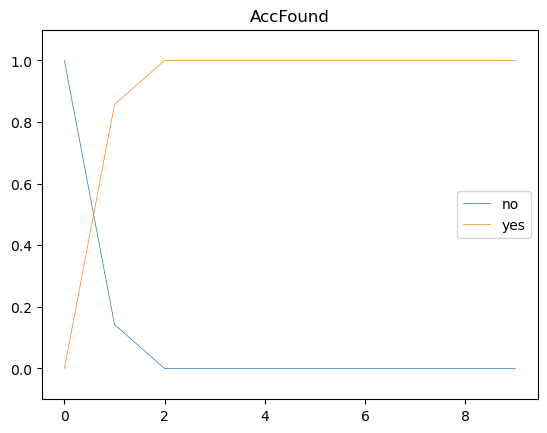

Showing ('AccFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,0.496000,0.504000
3,0.347687,0.652313
4,0.346968,0.653032
5,0.775068,0.224932
6,0.809793,0.190207
7,0.803154,0.196846
8,0.803185,0.196815
9,0.803185,0.196815


Plotting ('AccFound', ['no', 'yes']) for agent_j


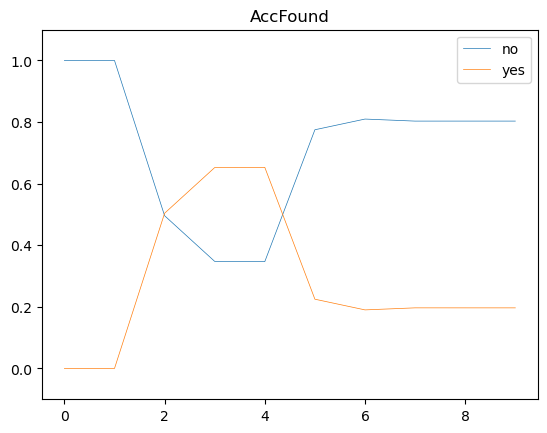

Showing ('DataFound', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataFound', ['no', 'yes']) for state:


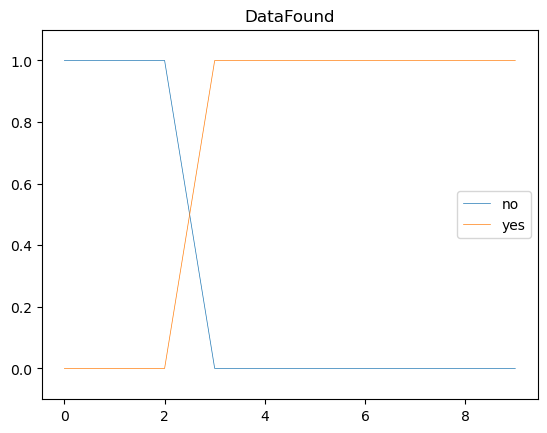

Showing ('DataFound', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,0.076923,0.923077
4,0.000042,0.999958
5,0.000042,0.999958
6,0.000042,0.999958
7,0.000042,0.999958
8,0.000042,0.999958
9,0.000042,0.999958


Plotting ('DataFound', ['no', 'yes']) for agent_i


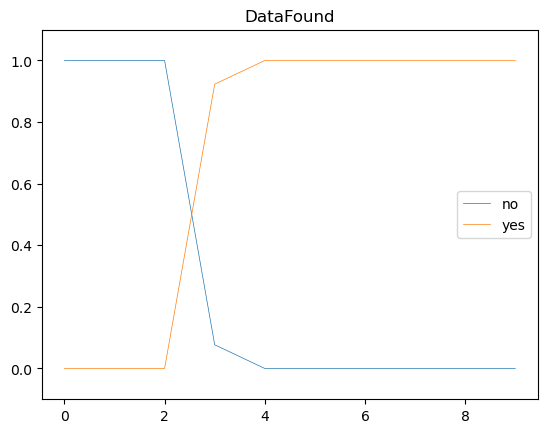

Showing ('DataFound', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,0.200000,0.800000
2,0.200000,0.800000
3,0.542920,0.457080
4,0.519883,0.480117
5,0.425283,0.574717
6,0.436658,0.563342
7,0.433123,0.566877
8,0.433139,0.566861
9,0.433139,0.566861


Plotting ('DataFound', ['no', 'yes']) for agent_j


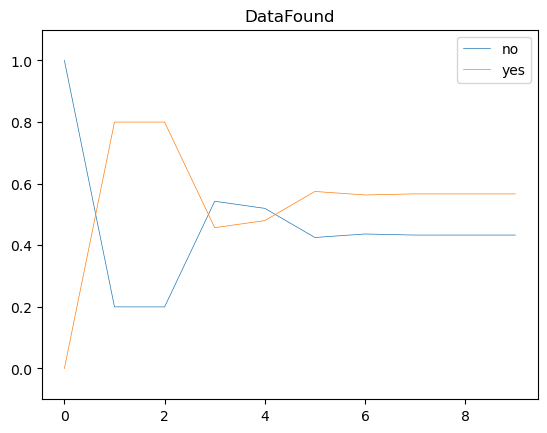

Showing ('AccessLevel', ['root', 'user']) for state:


,root,user
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccessLevel', ['root', 'user']) for state:


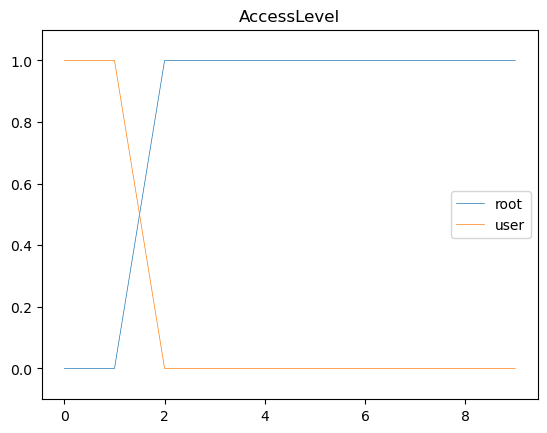

Showing ('AccessLevel', ['root', 'user']) for agent_i


,root,user
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AccessLevel', ['root', 'user']) for agent_i


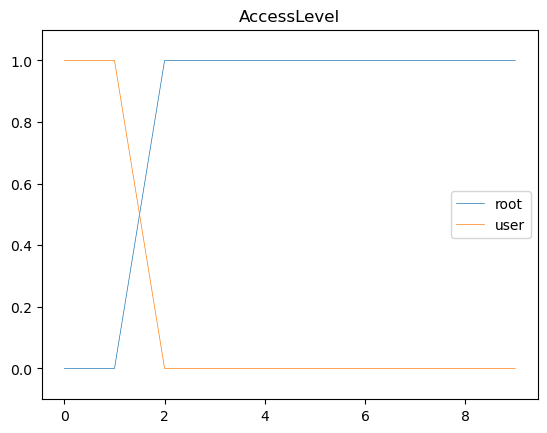

Showing ('AccessLevel', ['root', 'user']) for agent_j


,root,user
0,0.000000,1.000000
1,0.000000,1.000000
2,0.000000,1.000000
3,0.259164,0.740836
4,0.587082,0.412918
5,0.079049,0.920951
6,0.037788,0.962212
7,0.045676,0.954324
8,0.045639,0.954361
9,0.045639,0.954361


Plotting ('AccessLevel', ['root', 'user']) for agent_j


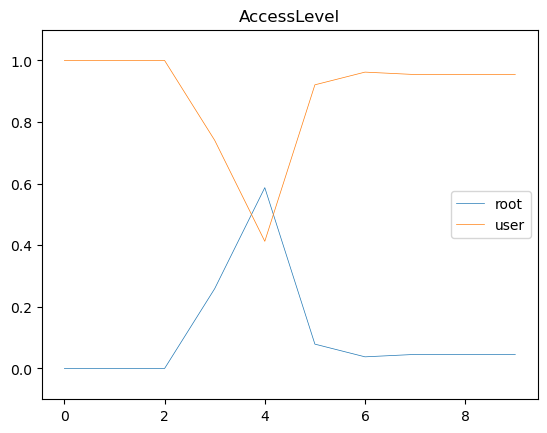

Showing ('AttActive', ['no', 'yes']) for state:


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for state:


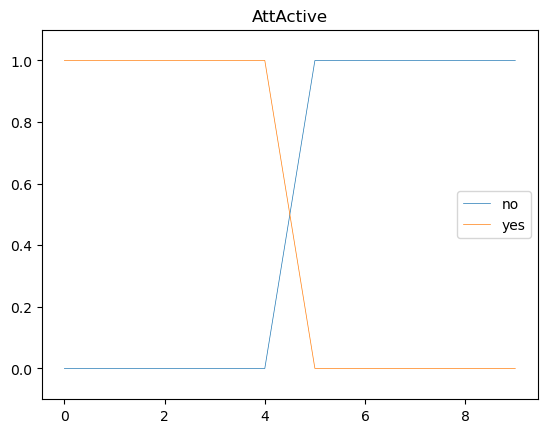

Showing ('AttActive', ['no', 'yes']) for agent_i


,no,yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


Plotting ('AttActive', ['no', 'yes']) for agent_i


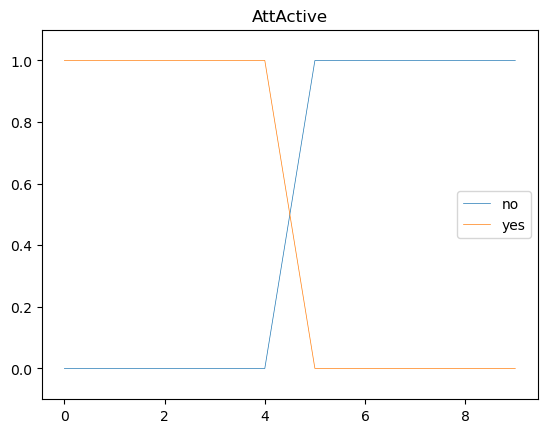

Showing ('AttActive', ['no', 'yes']) for agent_j


,no,yes
0,0.000000,1.000000e+00
1,0.000000,1.000000e+00
2,0.297000,7.030000e-01
3,0.276396,7.236037e-01
4,0.402911,5.970893e-01
5,0.922879,7.712125e-02
6,0.997200,2.800148e-03
7,0.991239,8.761241e-03
8,0.999998,2.442619e-06
9,1.000000,3.176087e-08


Plotting ('AttActive', ['no', 'yes']) for agent_j


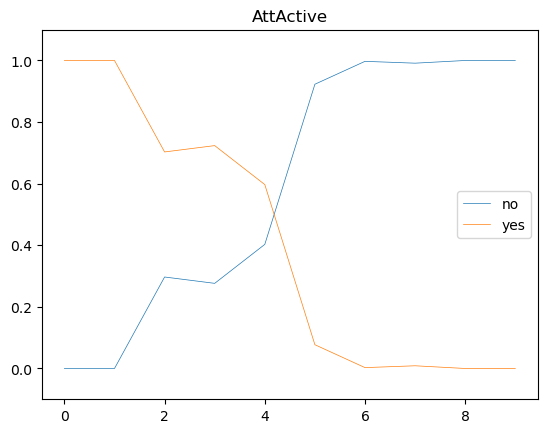

Showing ('DataInjected', ['no', 'yes']) for state:


,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


Plotting ('DataInjected', ['no', 'yes']) for state:


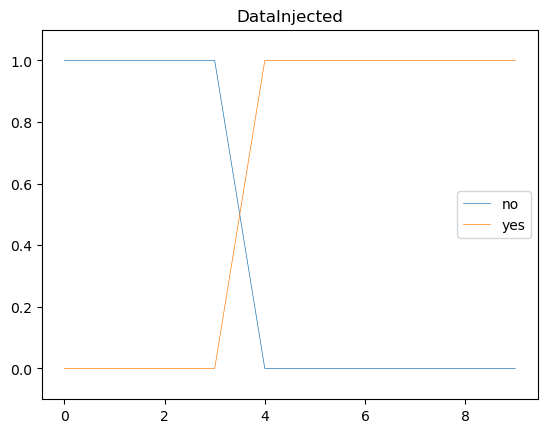

Showing ('DataInjected', ['no', 'yes']) for agent_i


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,0.000042,0.999958
5,0.000042,0.999958
6,0.000042,0.999958
7,0.000042,0.999958
8,0.000042,0.999958
9,0.000042,0.999958


Plotting ('DataInjected', ['no', 'yes']) for agent_i


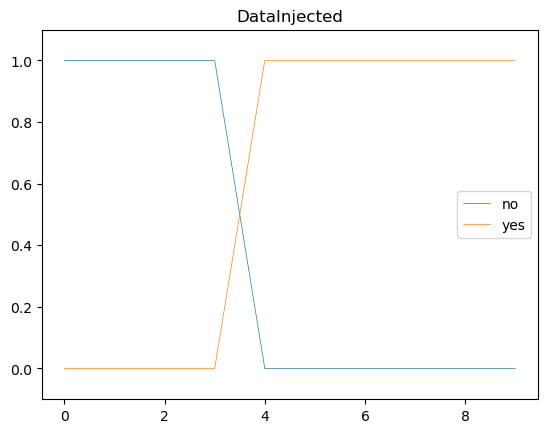

Showing ('DataInjected', ['no', 'yes']) for agent_j


,no,yes
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,1.000000,0.000000
5,0.970031,0.029970
6,0.966591,0.033409
7,0.958228,0.041772
8,0.958225,0.041775
9,0.958225,0.041775


Plotting ('DataInjected', ['no', 'yes']) for agent_j


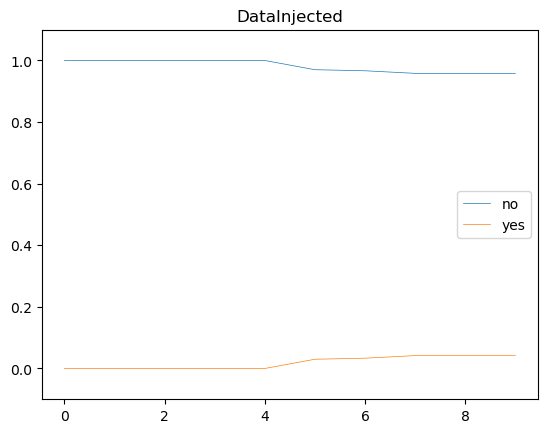

=============== End interaction trace


In [9]:
from IPython.display import display, HTML
from functools import reduce

for trace in data[:5]:
    actions = summarize_interaction.pull_actions(trace)
    display(actions)
    
    try:
        frame_beliefs = summarize_interaction.pull_frame_beliefs(trace)
        
        i_PAj = summarize_interaction.pull_from_trace(trace, lambda x: x, "i_P(Aj)")
        i_PAj = list(reduce(lambda a, b: a + b, map(lambda x: list(x.values()), i_PAj)))
        i_PAj = pandas.DataFrame.from_dict(i_PAj)
        print("Agent i's P(Aj)")
        display(i_PAj)

        j_PAj = summarize_interaction.pull_from_trace(trace, lambda x: x, "j_P(Aj)")
        j_PAj = list(reduce(lambda a, b: a + b, map(lambda x: list(x.values()), j_PAj)))
        j_PAj = pandas.DataFrame.from_dict(j_PAj)
        print("Agent j's P(Aj)")
        display(j_PAj)

        for _b_theta in frame_beliefs:
            display(_b_theta)
            _b_theta.plot(linewidth=0.5)
            plotter.ylim(-0.1, 1.1)
            plotter.show()
    except Exception as e:
        print(e)
        
    for k in keys:
        beliefs = summarize_interaction.show_belief(trace, k)

        for _b in beliefs.keys():
            print(f"Showing {k} for {_b}")
            display(beliefs[_b])

            print(f"Plotting {k} for {_b}")
            beliefs[_b].plot(legend=True, title=k[0], linewidth=0.5)
            plotter.ylim(-0.1, 1.1)
            plotter.show()

    print("=============== End interaction trace")
    